Поставленная задача явялется задачей ранжирования. Опираться буду на информацию из хендбука: https://education.yandex.ru/handbook/ml/article/zadacha-ranzhirovaniya#metody-obucheniya-ranzhirovaniyu


NDCG: https://arize.com/blog-course/ndcg/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Для начала обработка данных

In [11]:
train_df = pd.read_csv("train_df.csv")
train_df

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


In [12]:
train_df.describe()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
count,15081.000000,15081.0,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000,...,15081.000000,15081.000000,15081.000000,15081.0,15081.0,15081.0,15081.000000,15081.000000,15081.000000,15081.000000
mean,254806.827465,9.0,0.193754,0.464293,0.629865,15.928519,3.876401,33.802467,1.211193,1.793847,...,0.199545,0.426543,0.096461,0.0,0.0,0.0,0.297465,0.030543,0.031207,0.021351
std,142374.568081,0.0,0.626654,1.183076,0.482857,5.311422,0.469749,11.316810,2.234887,1.885131,...,0.088724,0.247388,0.063323,0.0,0.0,0.0,0.311962,0.112984,0.115598,0.144558
min,116.000000,9.0,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,134823.000000,9.0,0.000000,0.000000,0.000000,9.000000,4.000000,26.000000,0.000000,0.000000,...,0.168583,0.255086,0.052658,0.0,0.0,0.0,0.036740,0.000000,0.000000,0.000000
50%,255859.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,34.000000,0.000000,2.000000,...,0.212743,0.430880,0.091705,0.0,0.0,0.0,0.176140,0.000000,0.000000,0.000000
75%,376175.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,44.000000,1.000000,3.000000,...,0.253825,0.603686,0.136017,0.0,0.0,0.0,0.529100,0.000000,0.000000,0.000000
max,496975.000000,9.0,3.000000,6.000000,1.000000,20.000000,6.000000,49.000000,7.000000,7.000000,...,0.485510,0.999072,0.411563,0.0,0.0,0.0,1.000020,0.846272,0.908132,1.000000


In [13]:
val_df = train_df[:int(len(train_df) * 0.2)]
train_df = train_df[int(len(train_df) * 0.2):]

In [14]:
val_df['target'].sum()

86

Заметим, что признаки не нормированны и есть полностью нулевые столбцы

In [15]:
sum(train_df.isnull().any())

0

In [16]:
test_df = pd.read_csv("test_df.csv")
test_df.describe()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
count,1529.000000,1529.0,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,...,1529.000000,1529.000000,1529.000000,1529.0,1529.0,1529.0,1529.000000,1529.000000,1529.000000,1529.000000
mean,275783.351864,9.0,0.176586,0.452583,0.614127,15.755396,3.858731,32.606933,1.057554,1.833878,...,0.205209,0.448991,0.103061,0.0,0.0,0.0,0.297876,0.030655,0.031390,0.022237
std,149946.991689,0.0,0.557153,1.117101,0.486960,5.356561,0.399186,10.926778,2.075937,1.969301,...,0.086952,0.255577,0.067747,0.0,0.0,0.0,0.316741,0.111981,0.113095,0.147501
min,10655.000000,9.0,0.000000,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,123542.000000,9.0,0.000000,0.000000,0.000000,9.000000,4.000000,25.000000,0.000000,0.000000,...,0.176786,0.267725,0.055150,0.0,0.0,0.0,0.036740,0.000000,0.000000,0.000000
50%,305790.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,31.000000,0.000000,1.000000,...,0.216342,0.488493,0.101199,0.0,0.0,0.0,0.145400,0.000000,0.000000,0.000000
75%,397875.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,44.000000,0.000000,3.000000,...,0.256027,0.628704,0.143651,0.0,0.0,0.0,0.536740,0.000000,0.000000,0.000000
max,494635.000000,9.0,2.000000,5.000000,1.000000,20.000000,4.000000,49.000000,7.000000,6.000000,...,0.445427,0.997673,0.394140,0.0,0.0,0.0,1.000000,0.755875,0.672784,1.000000


In [17]:
sum(test_df.isnull().any())

0

In [18]:
pd.merge(train_df, test_df, how='inner', on=['search_id'])

,search_id,feature_0_x,feature_1_x,feature_2_x,feature_3_x,feature_4_x,feature_5_x,feature_6_x,feature_7_x,feature_8_x,...,feature_70_y,feature_71_y,feature_72_y,feature_73_y,feature_74_y,feature_75_y,feature_76_y,feature_77_y,feature_78_y,target_y


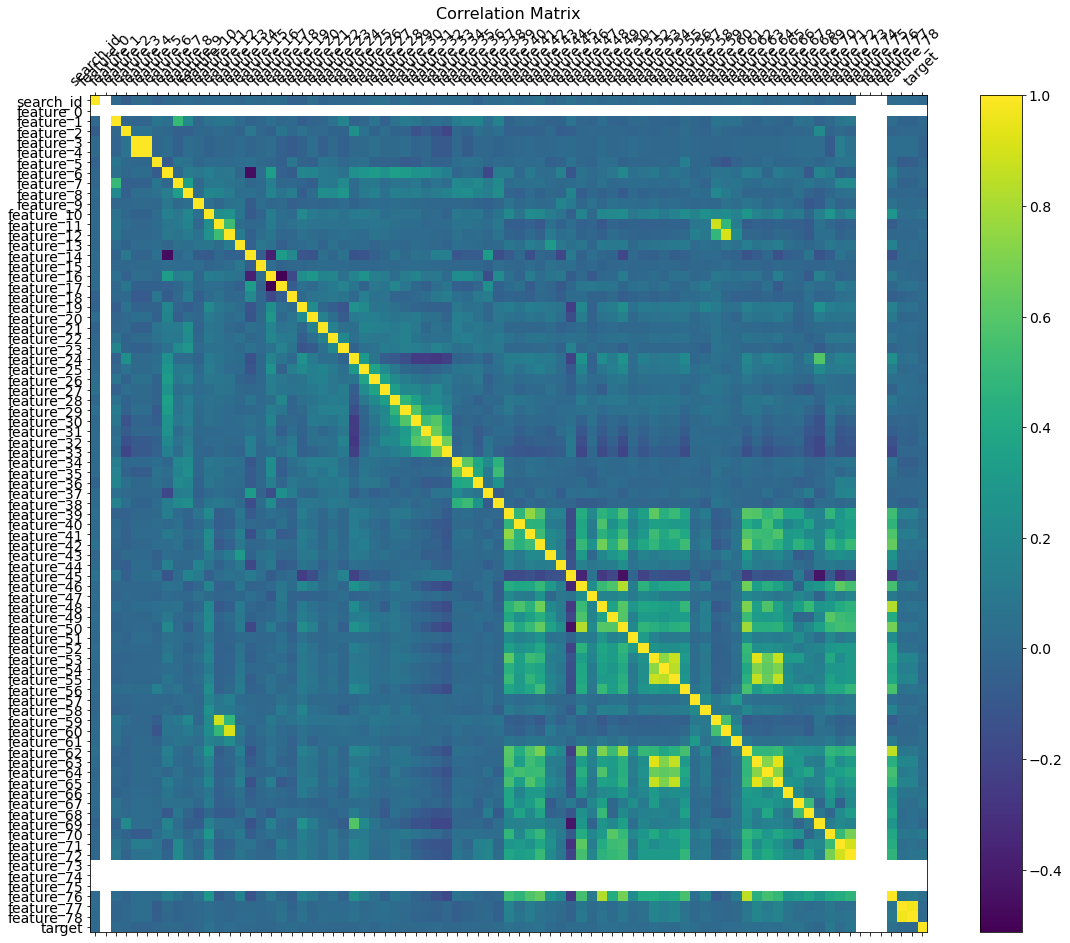

In [19]:
def coorelation_matrix(df):
  f = plt.figure(figsize=(19, 15))
  plt.matshow(df.corr(), fignum=f.number)
  plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
  plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
  cb = plt.colorbar()
  cb.ax.tick_params(labelsize=14)
  plt.title('Correlation Matrix', fontsize=16)

coorelation_matrix(train_df)

Интересно, что группы поиска не пересекаются

In [20]:
x_train = train_df.drop("target", axis=1)
y_train = train_df['target']

x_val = val_df.drop("target", axis=1)
y_val = val_df['target']

x_test = test_df.drop("target", axis=1)
y_test = test_df['target']


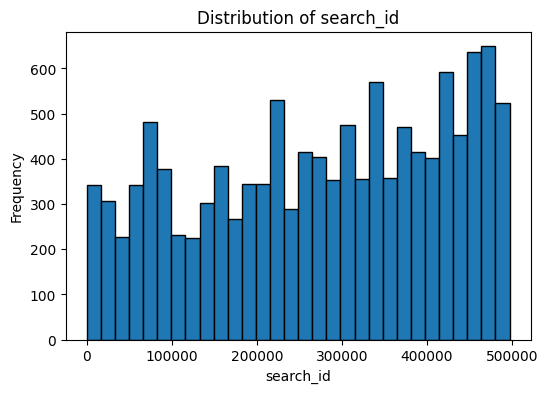

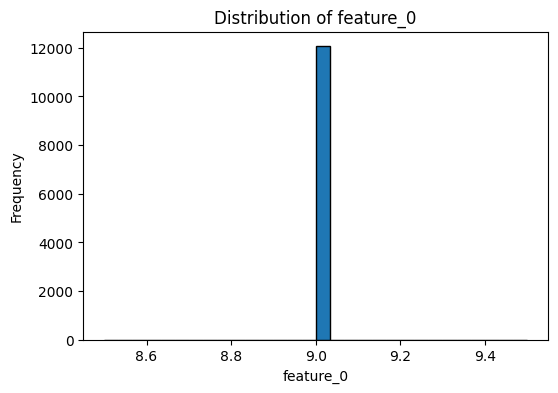

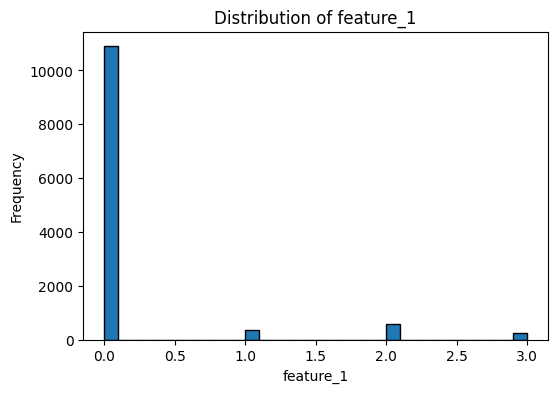

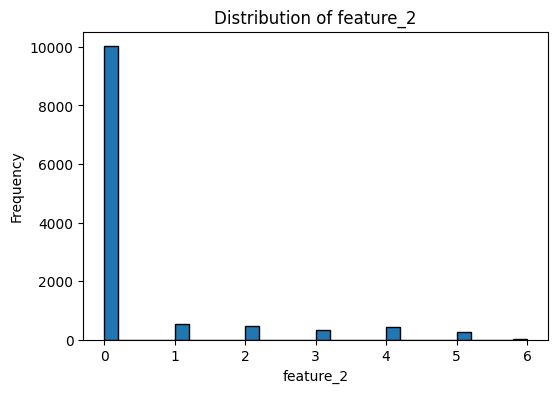

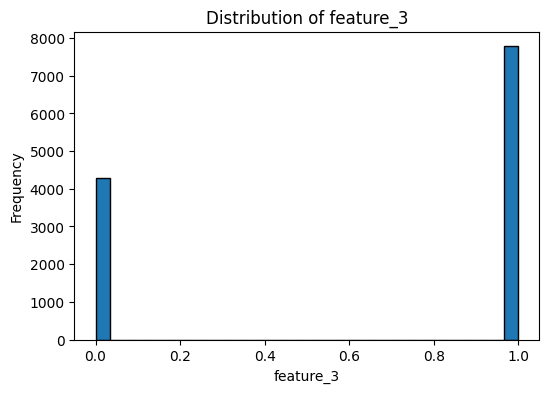

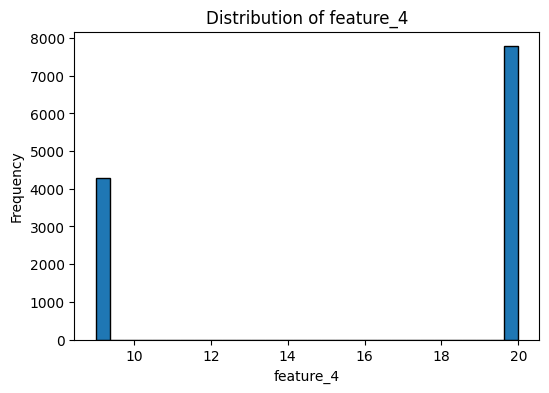

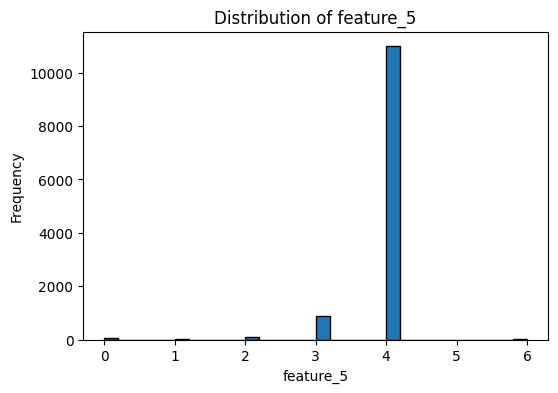

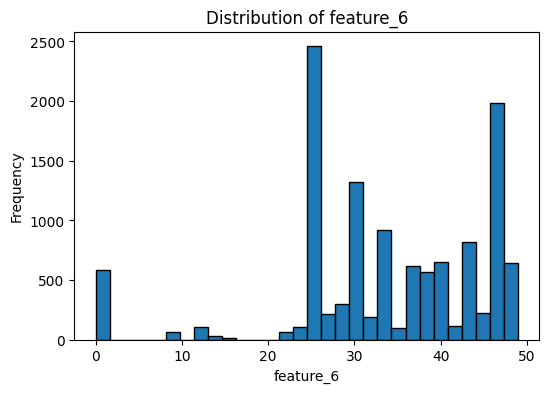

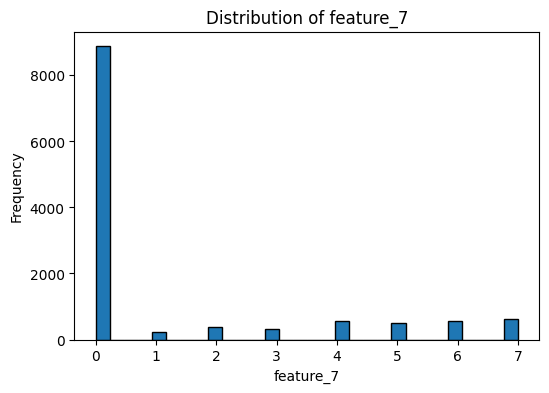

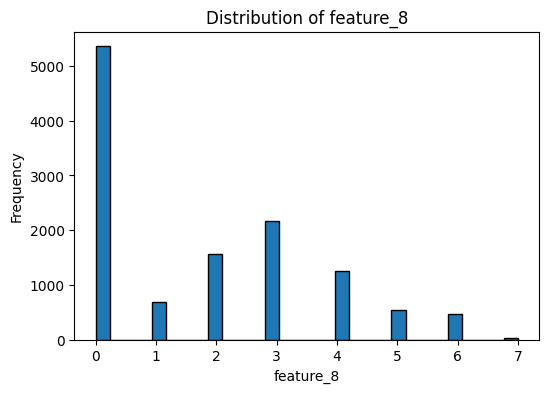

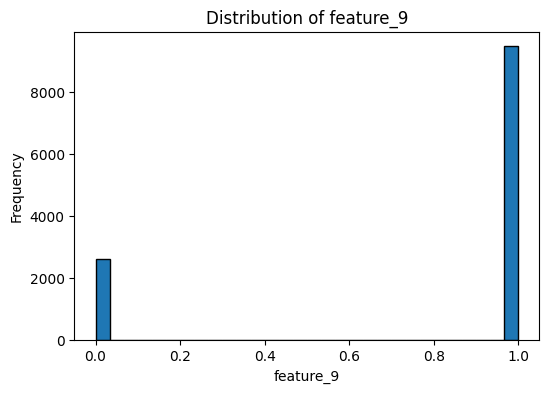

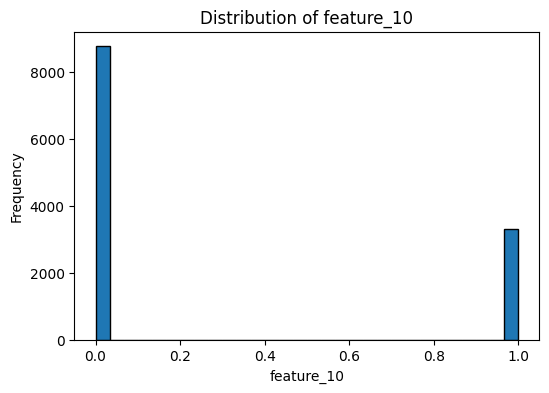

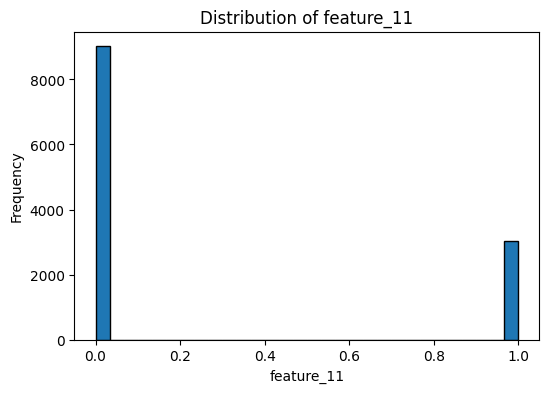

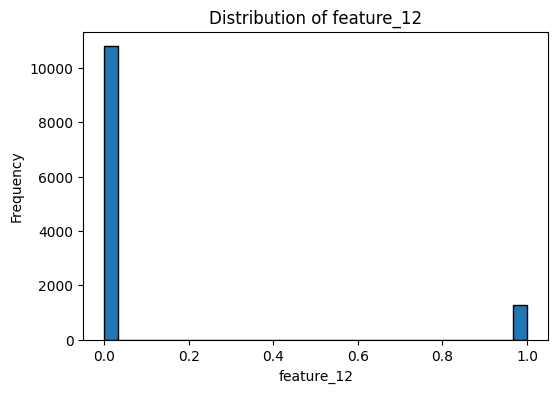

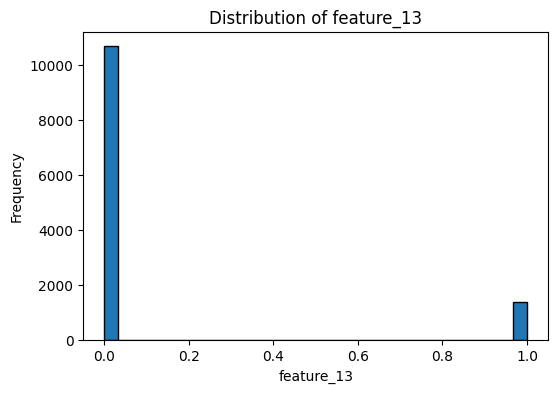

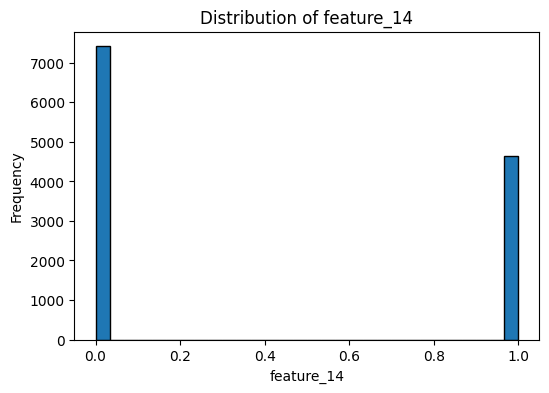

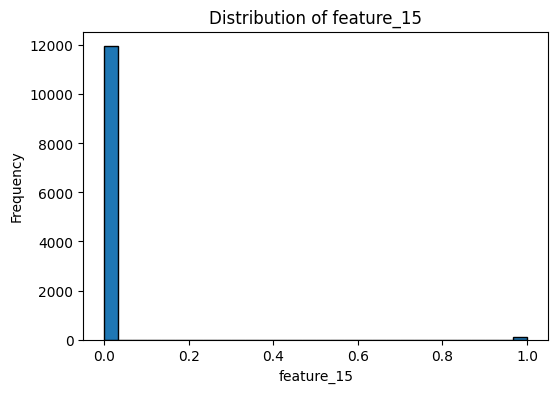

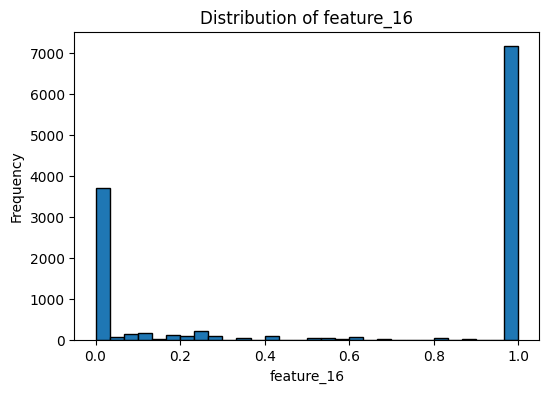

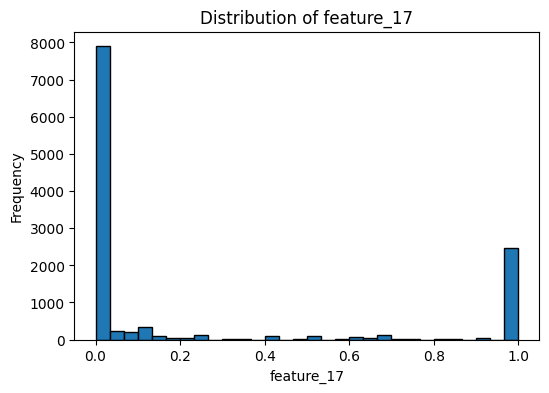

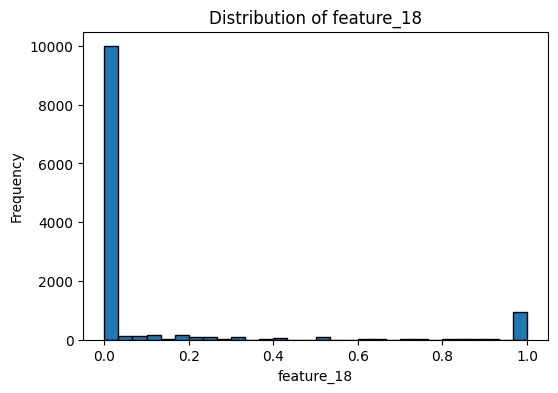

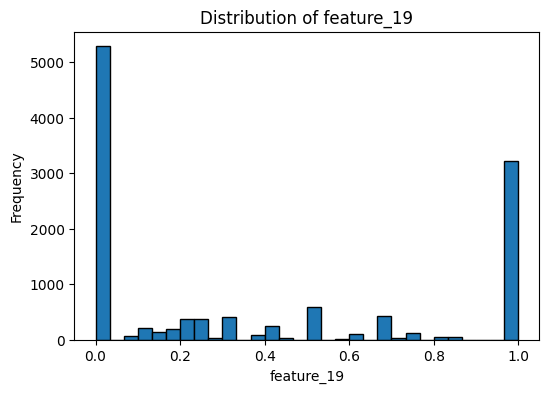

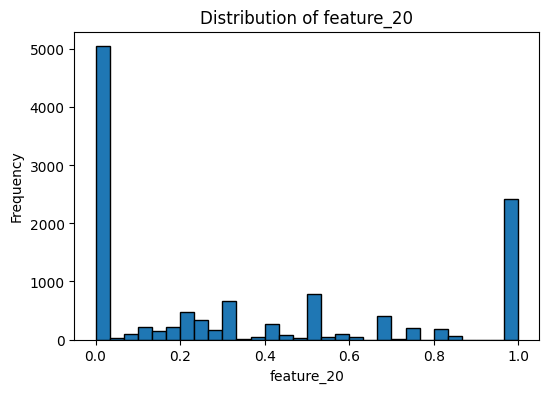

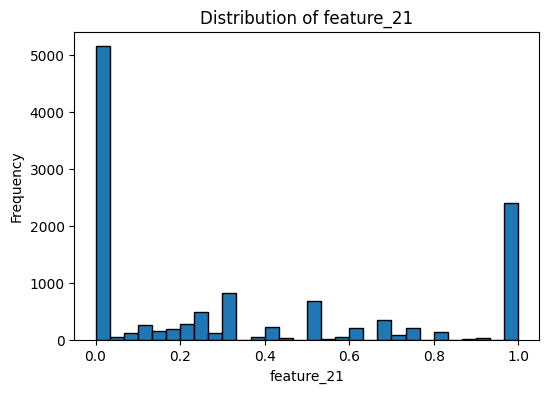

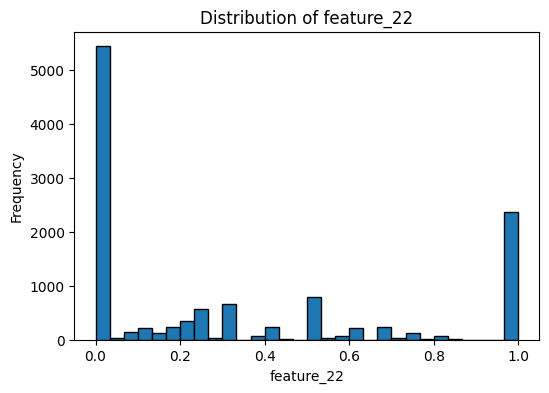

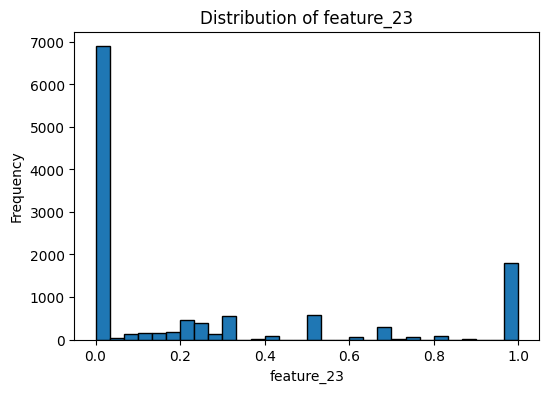

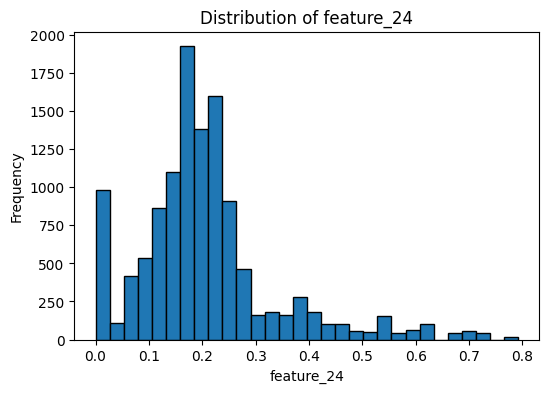

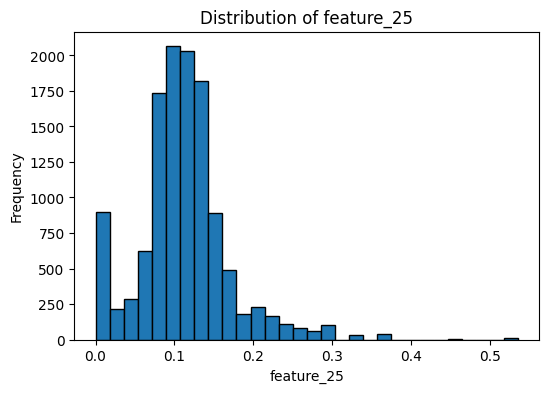

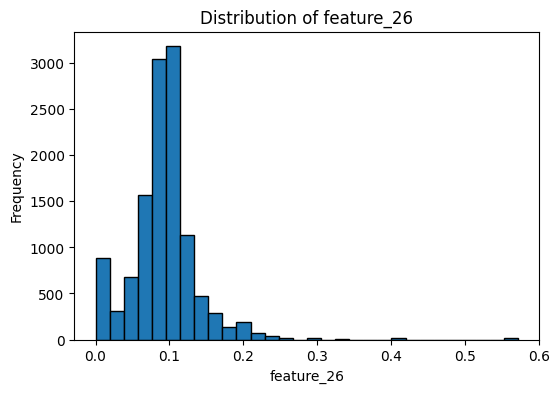

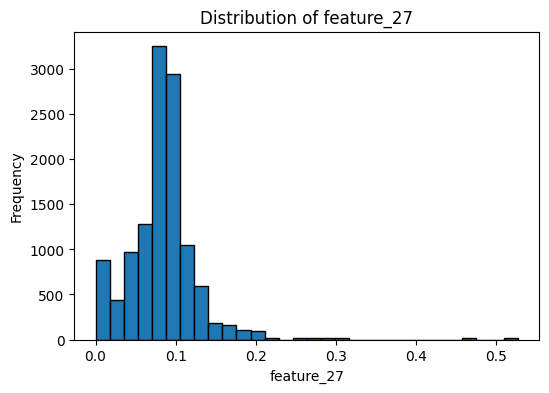

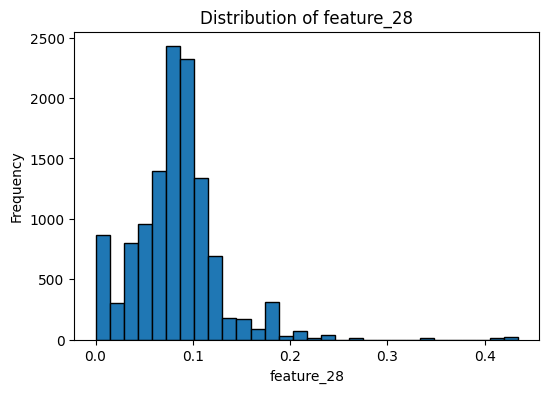

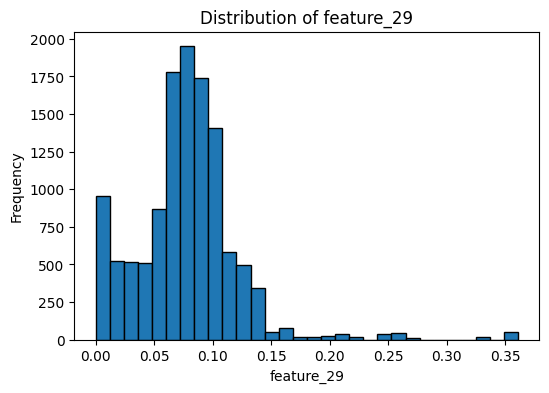

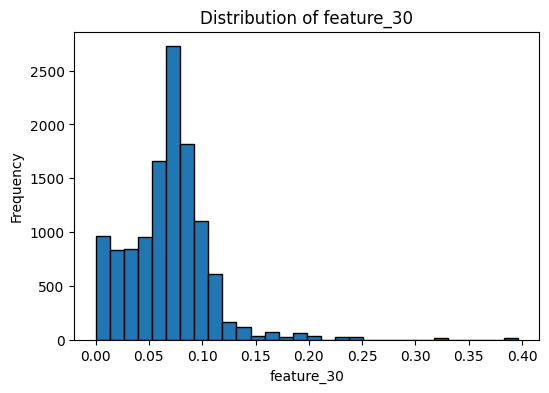

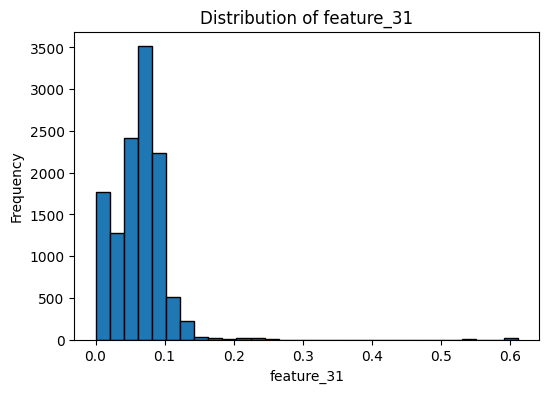

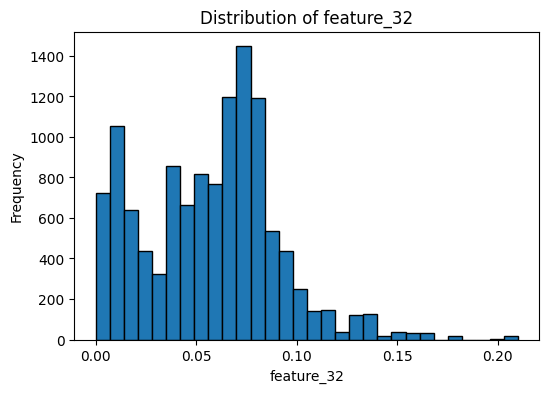

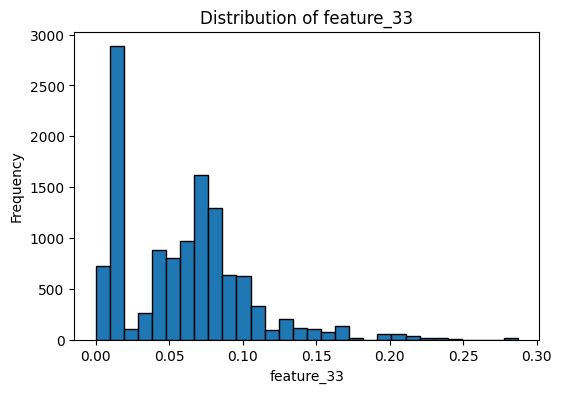

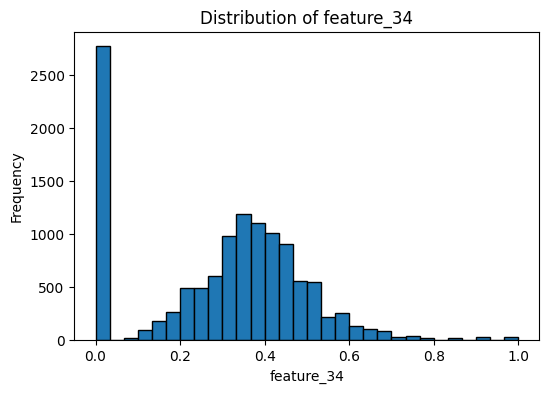

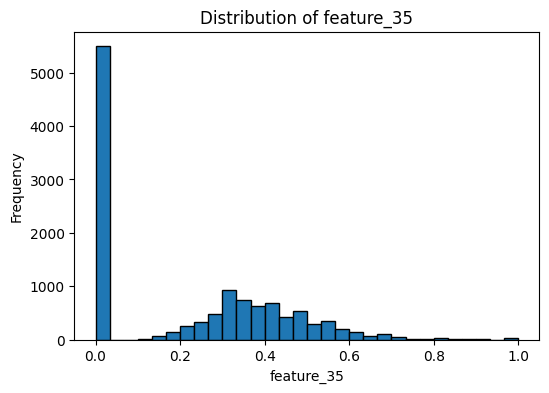

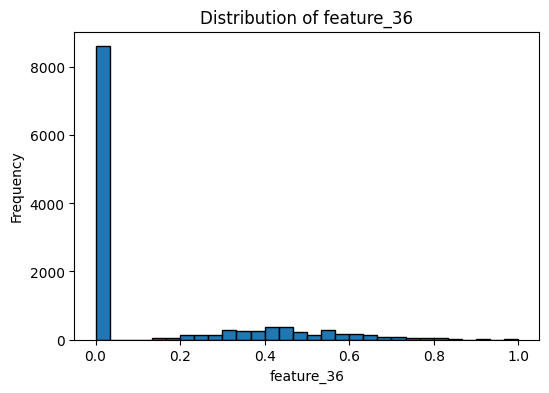

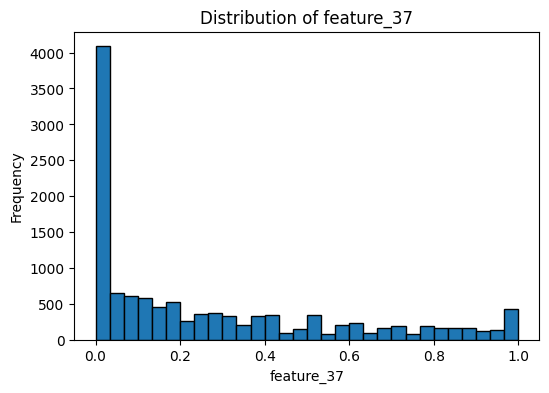

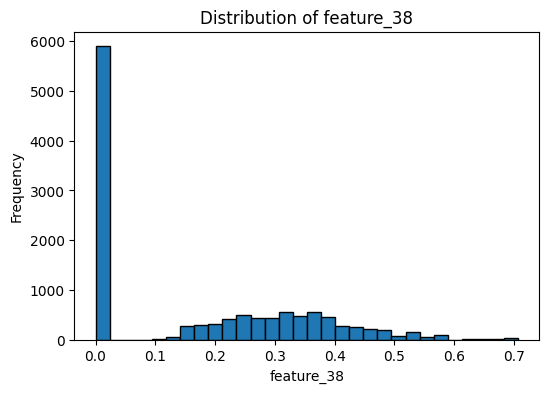

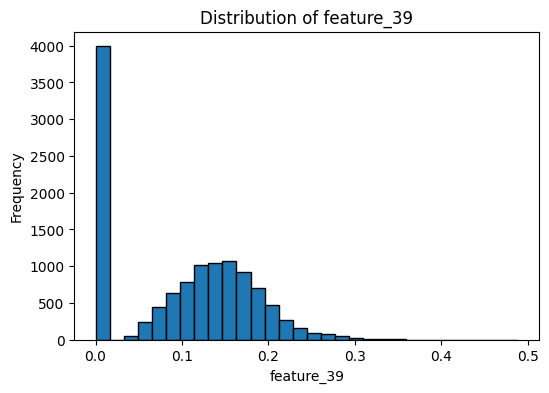

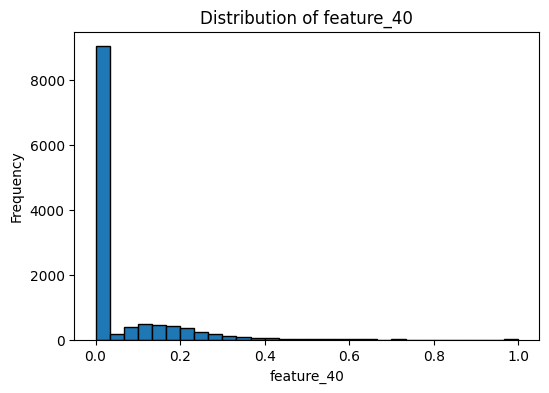

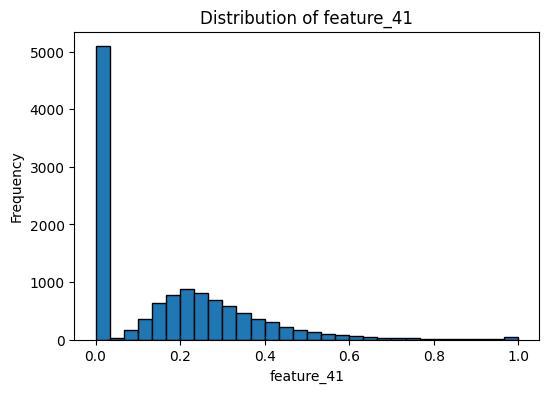

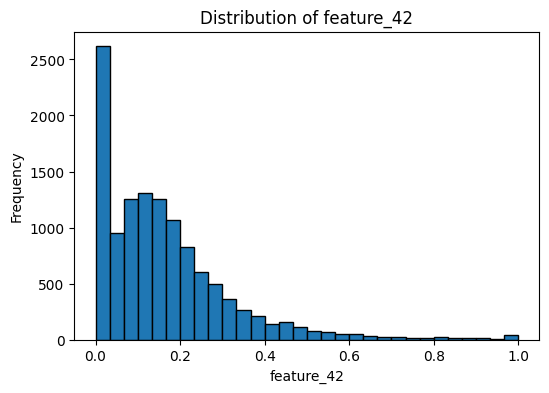

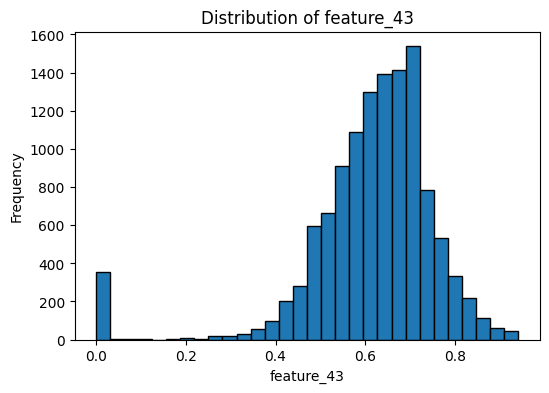

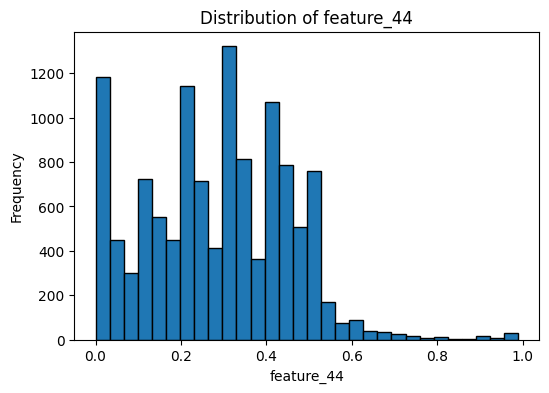

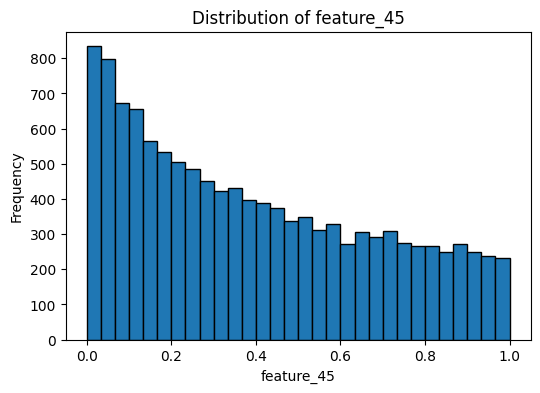

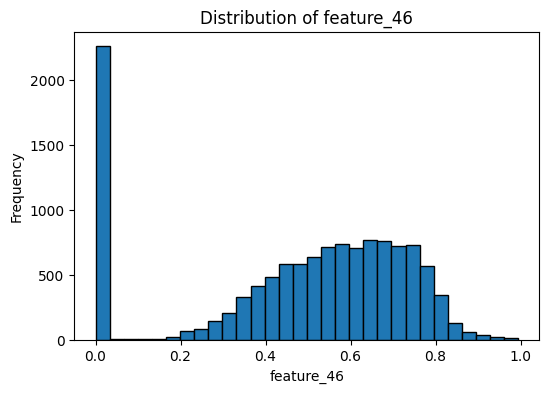

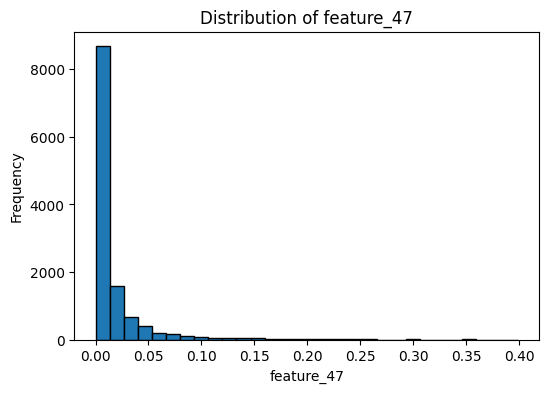

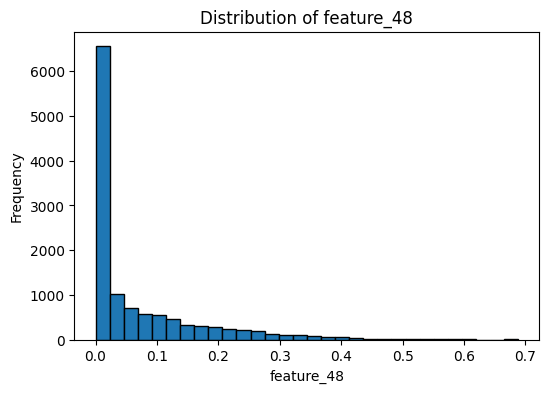

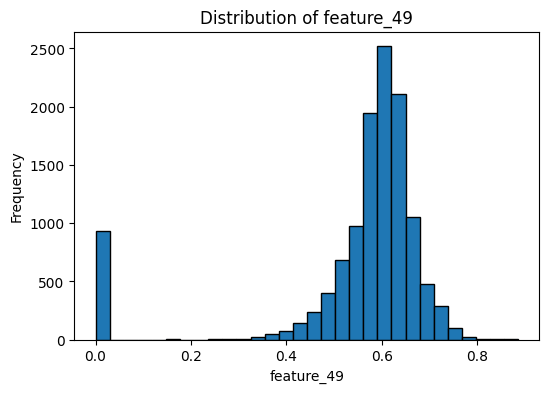

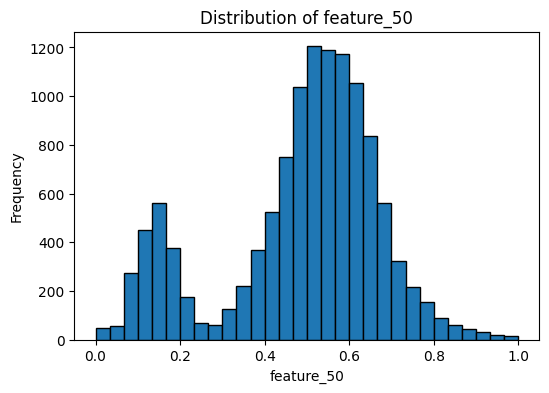

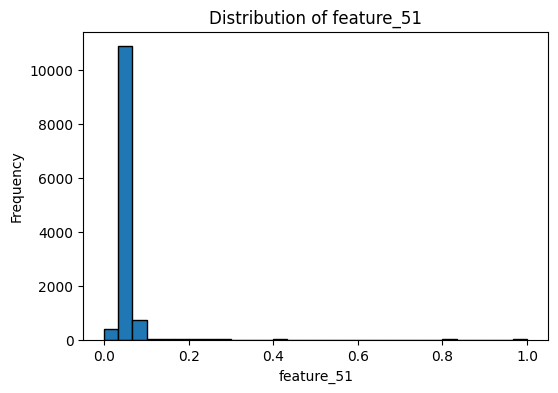

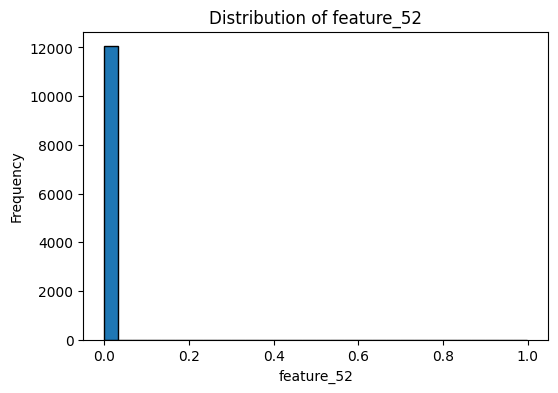

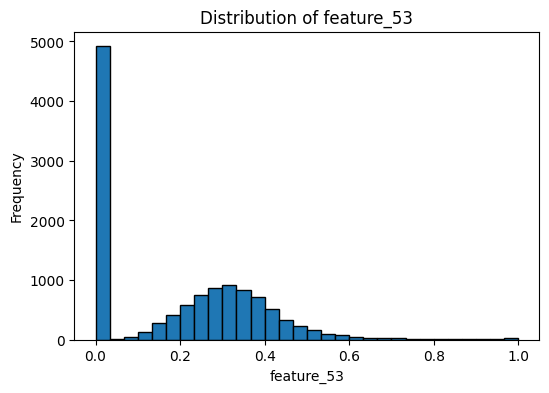

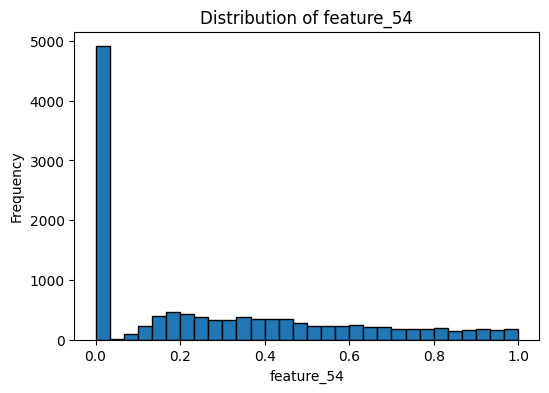

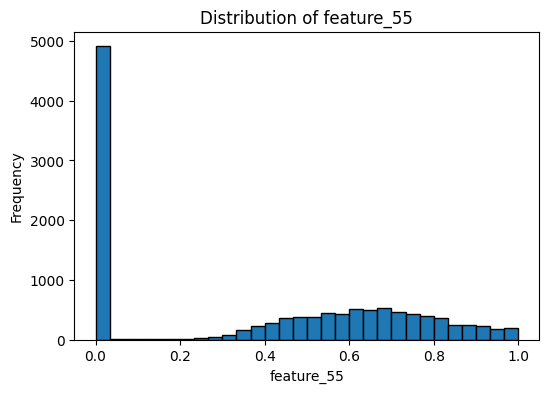

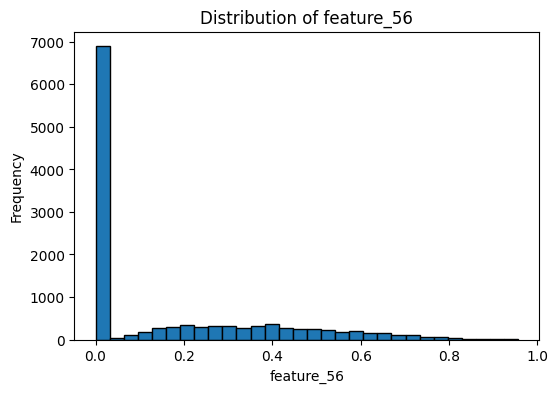

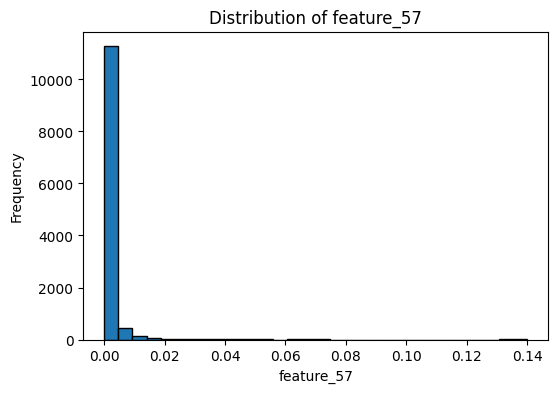

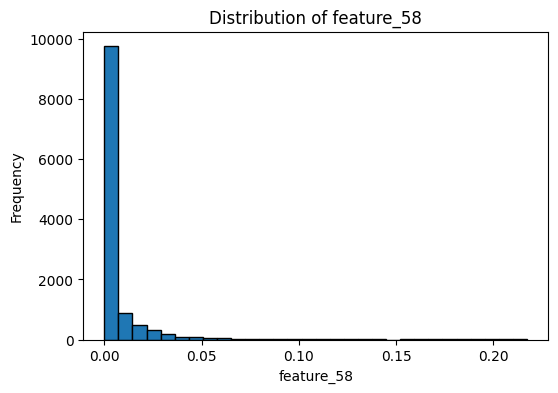

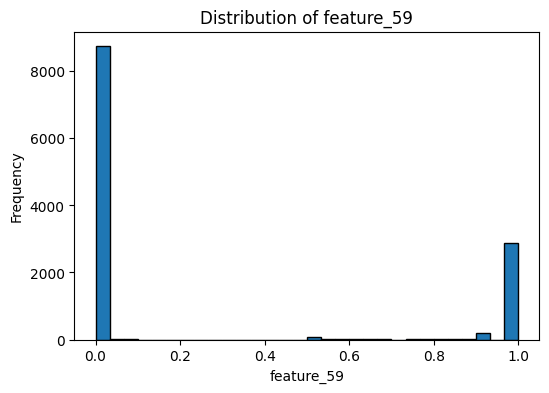

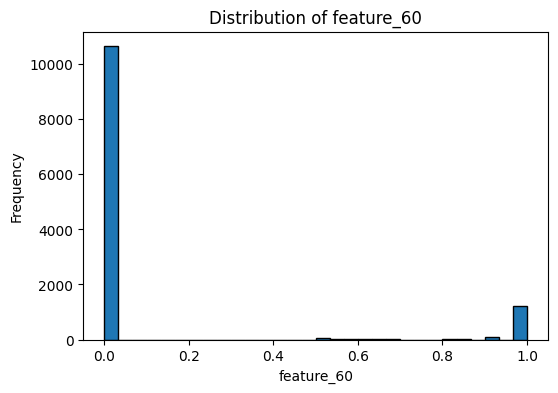

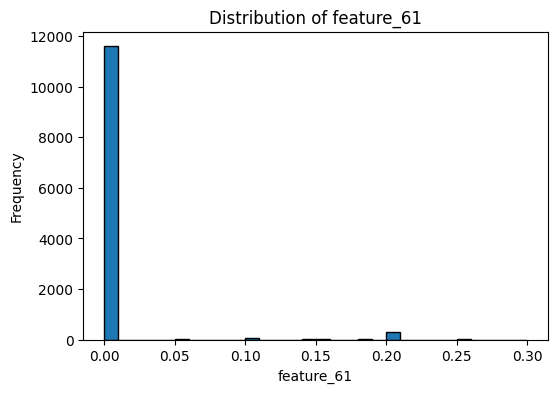

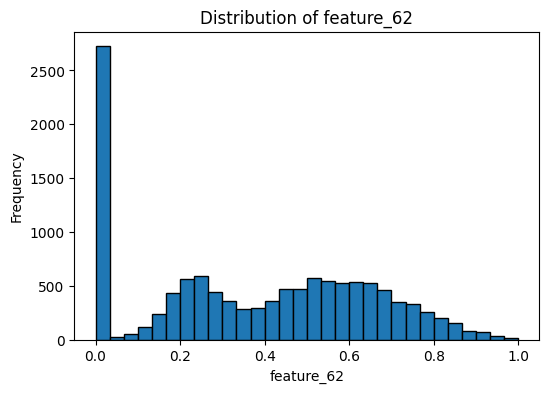

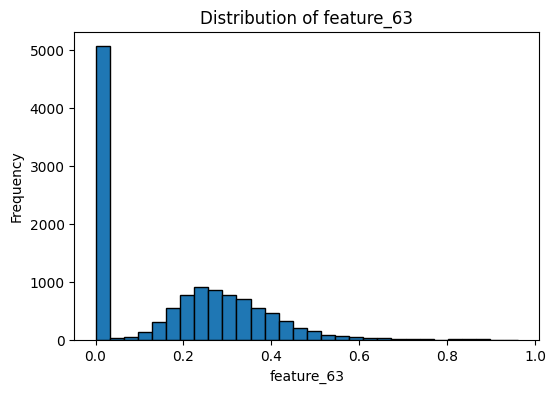

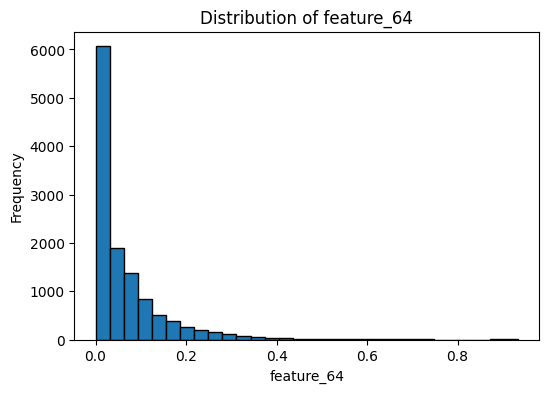

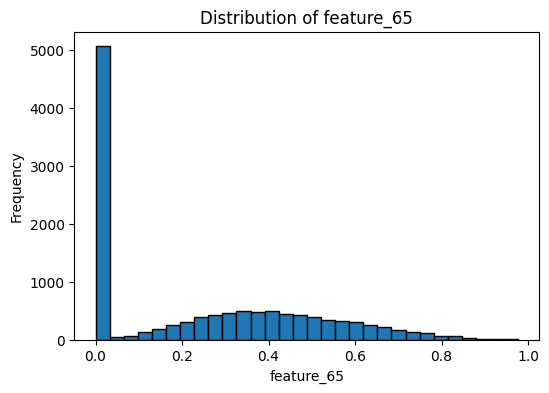

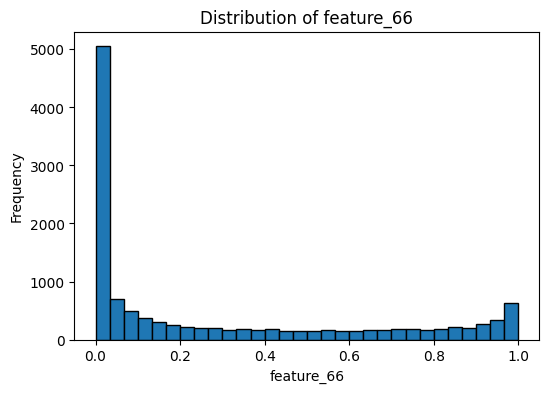

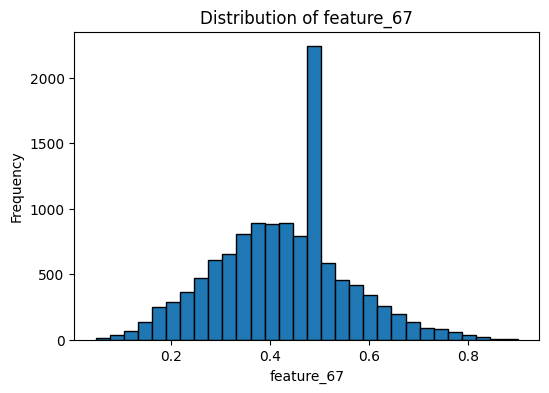

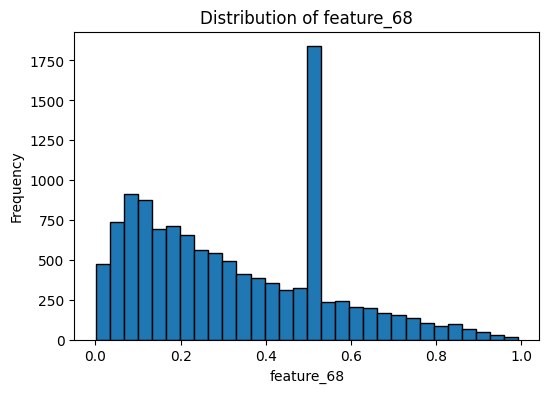

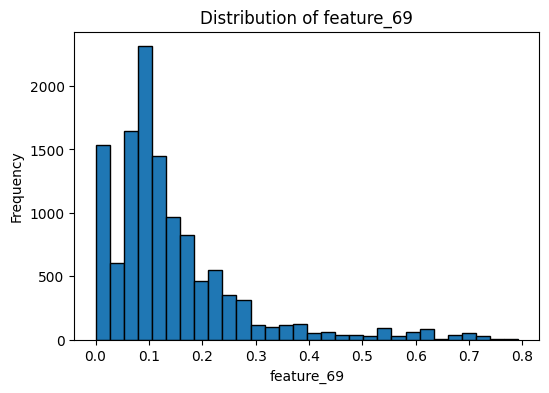

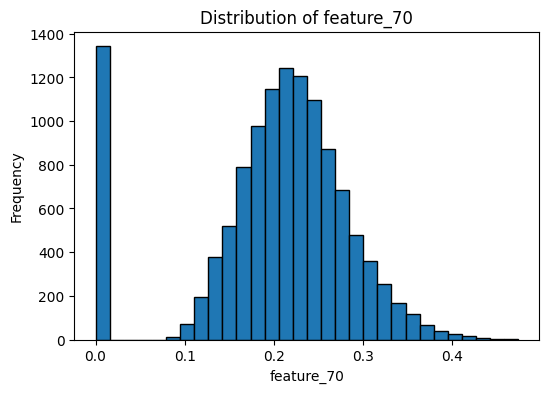

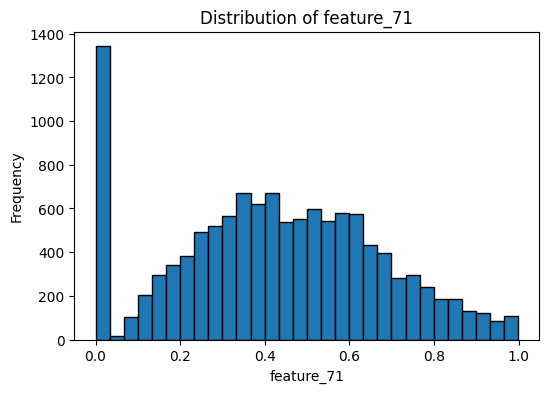

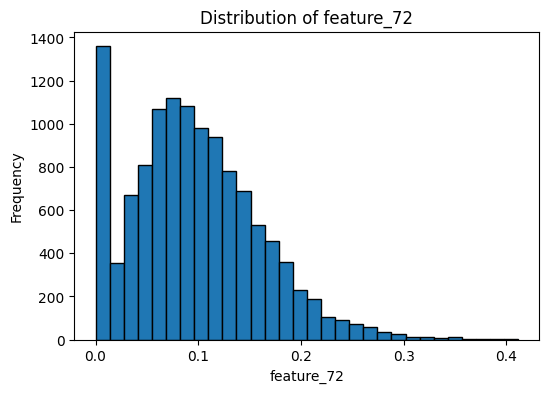

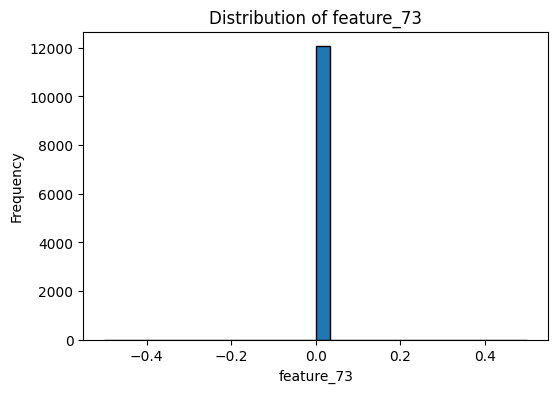

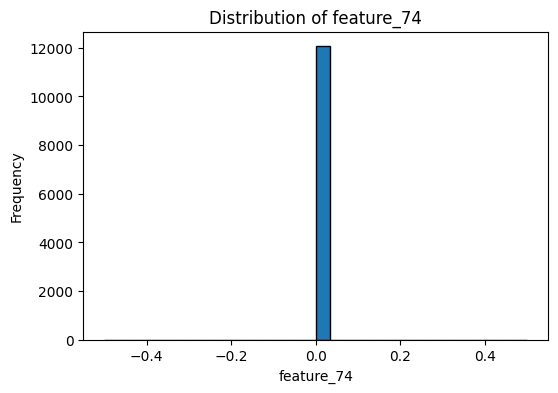

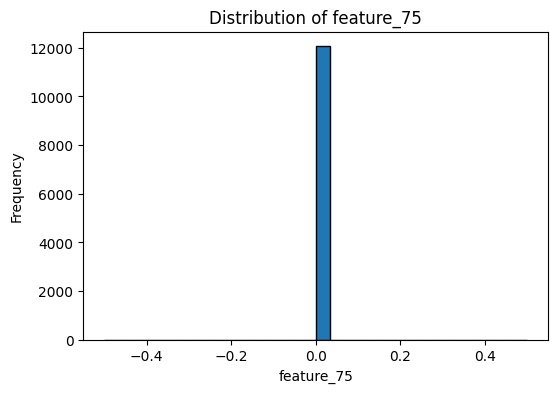

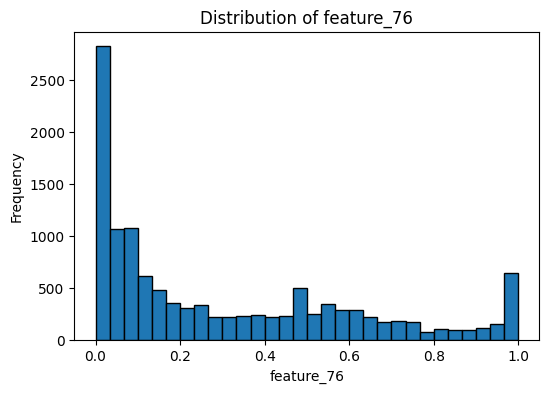

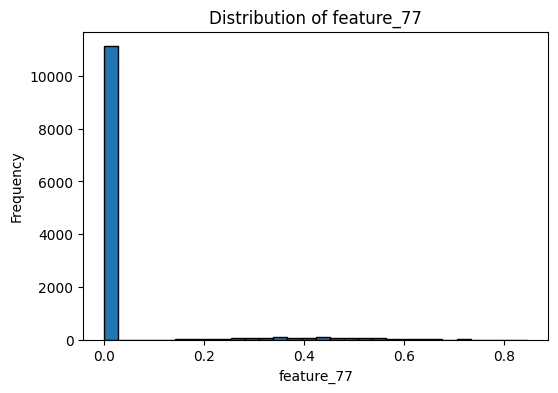

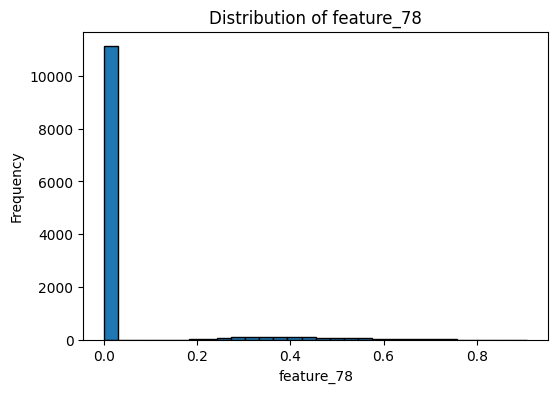

In [12]:
for column_name in x_train.columns:
    # Проверка, что столбец содержит числовые данные
      plt.figure(figsize=(6, 4))
      plt.hist(x_train[column_name], bins=30, edgecolor='black')  # Вы можете настроить количество "bins" по вашему усмотрению
      plt.title(f'Distribution of {column_name}')
      plt.xlabel(column_name)
      plt.ylabel('Frequency')
      plt.show()

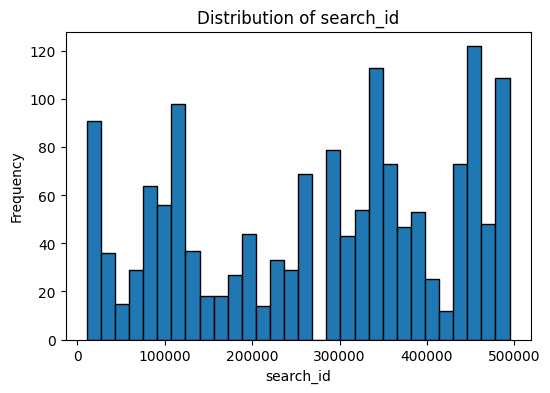

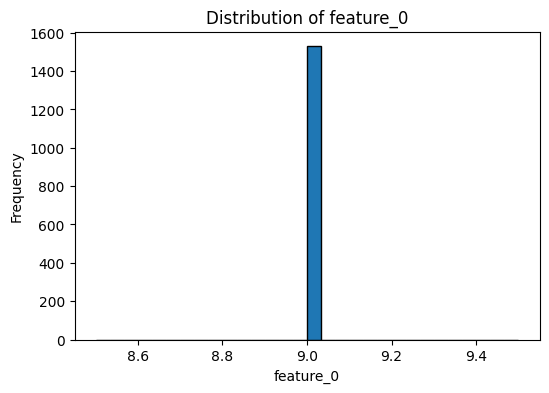

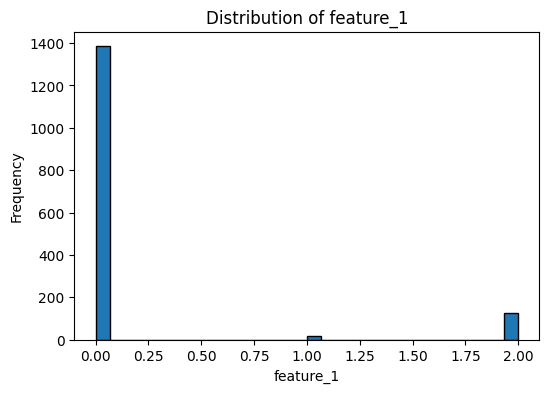

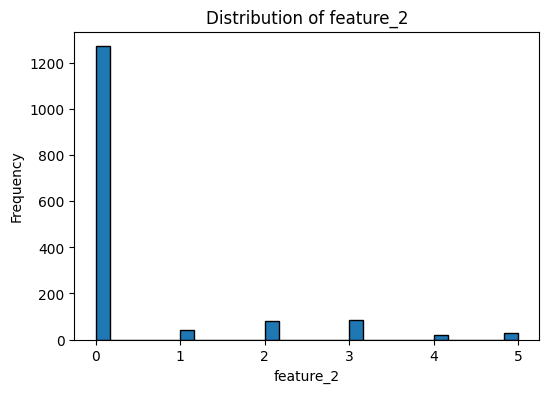

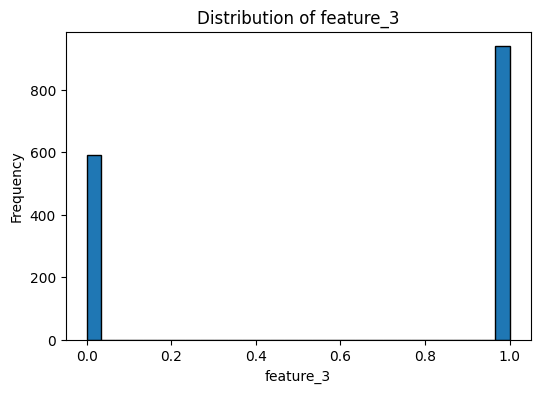

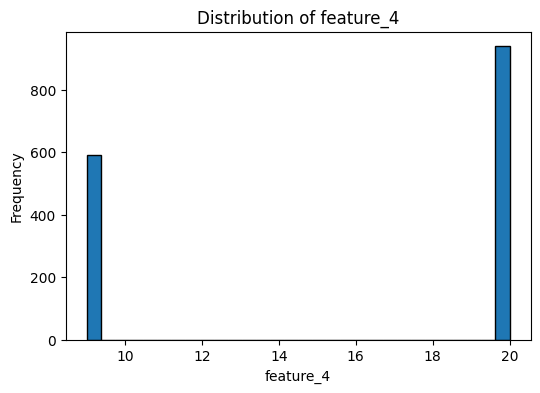

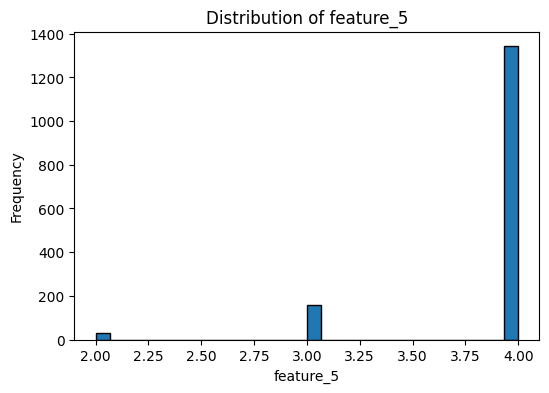

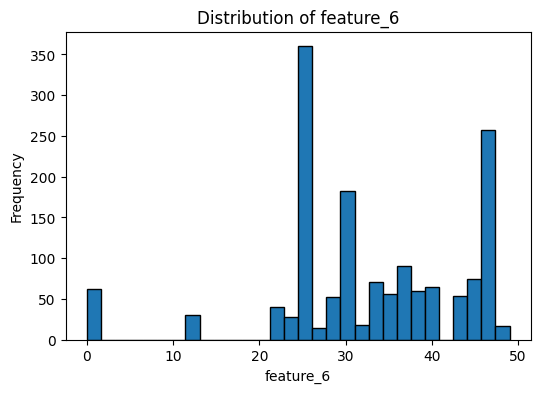

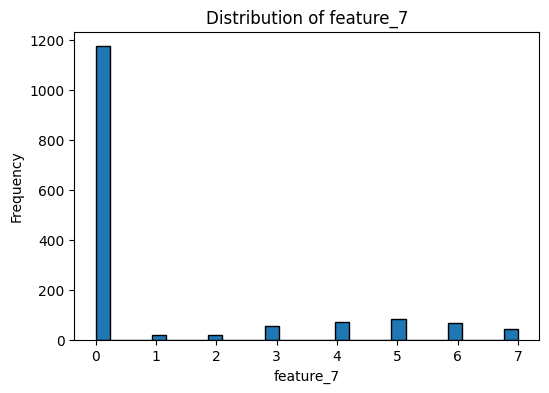

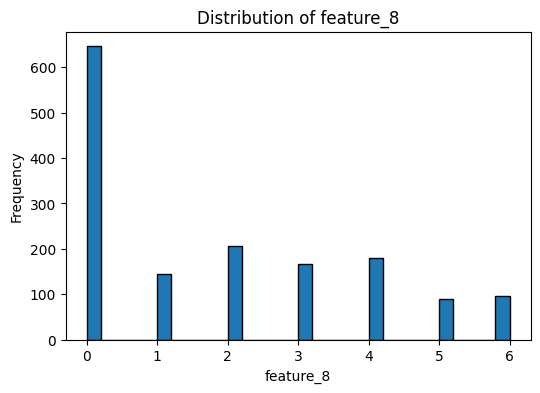

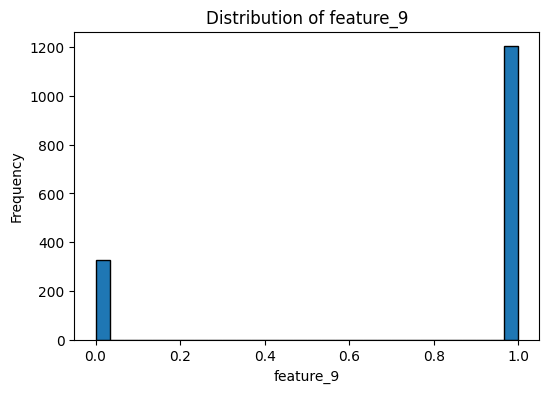

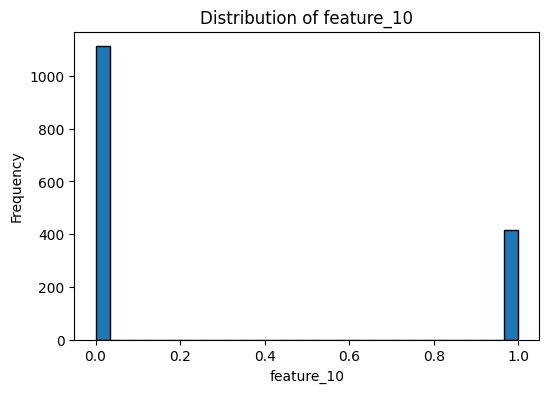

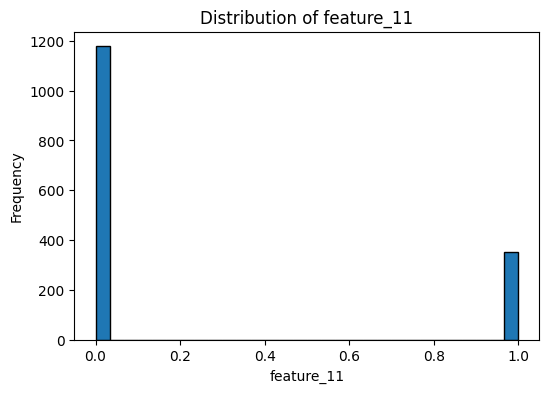

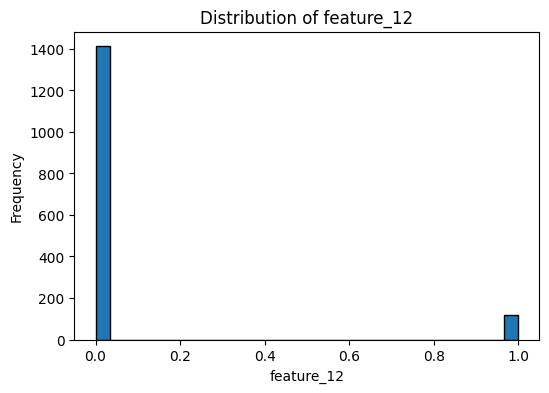

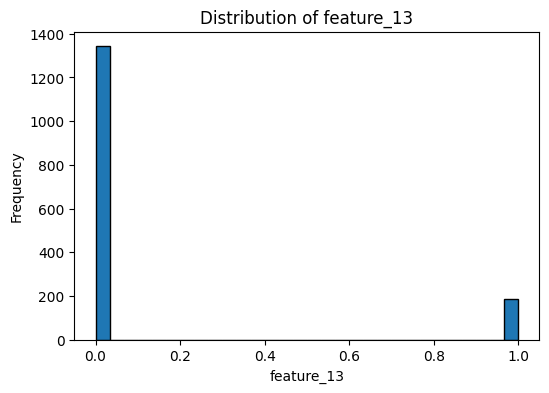

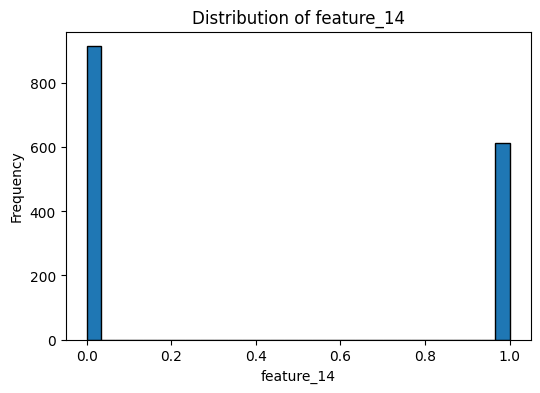

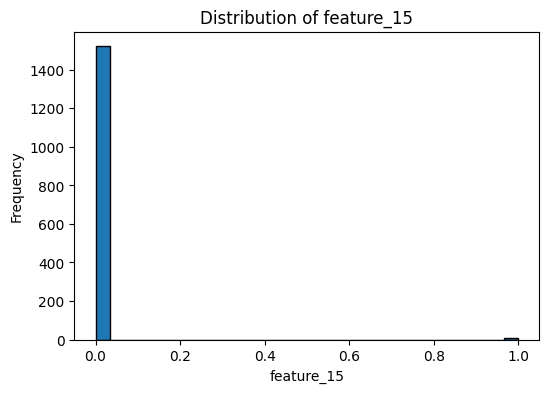

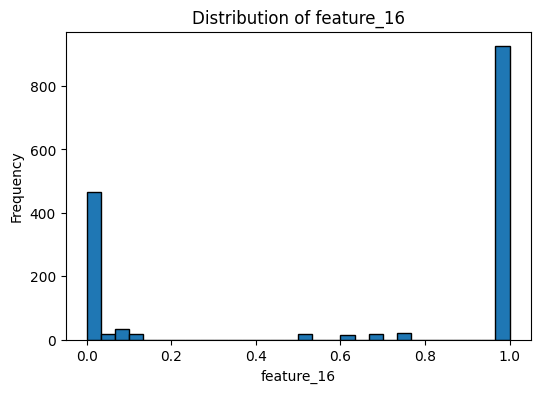

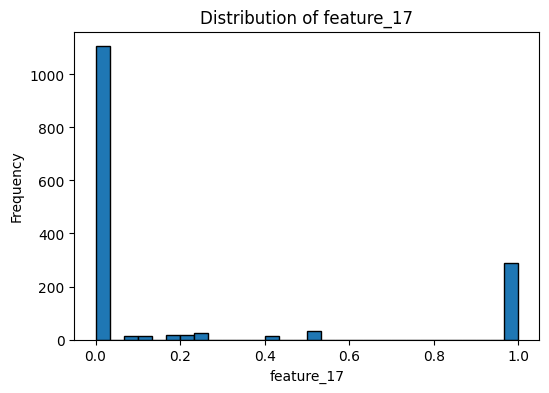

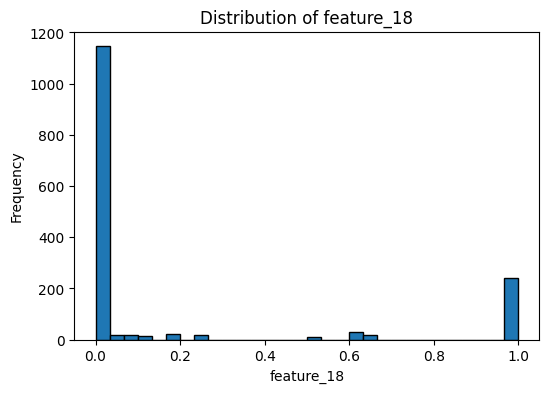

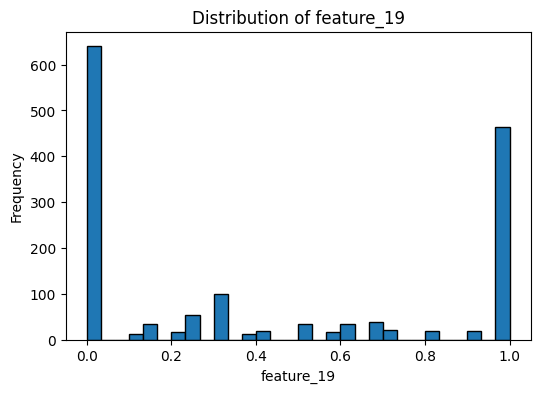

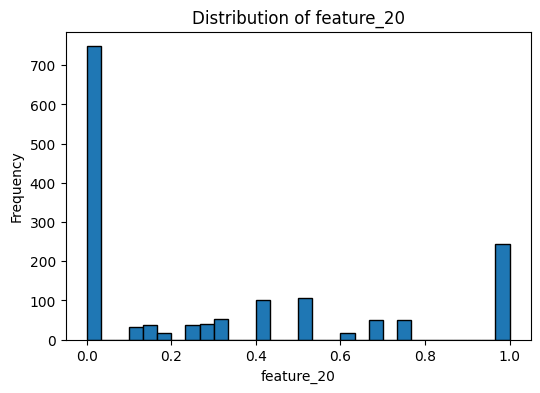

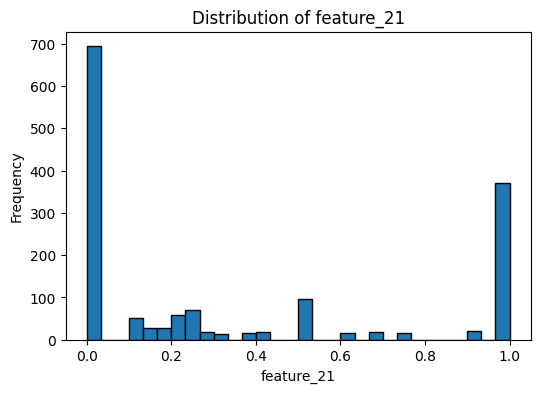

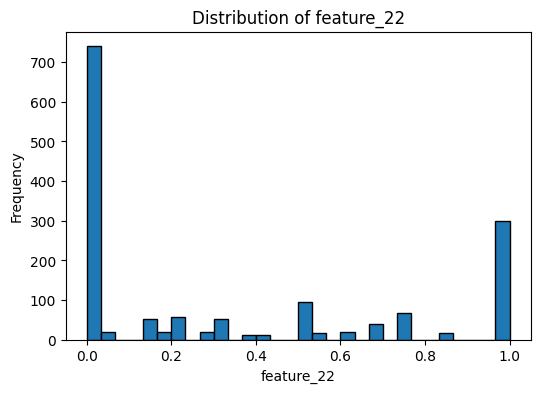

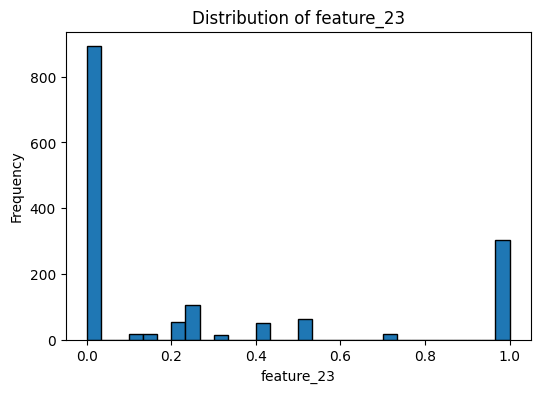

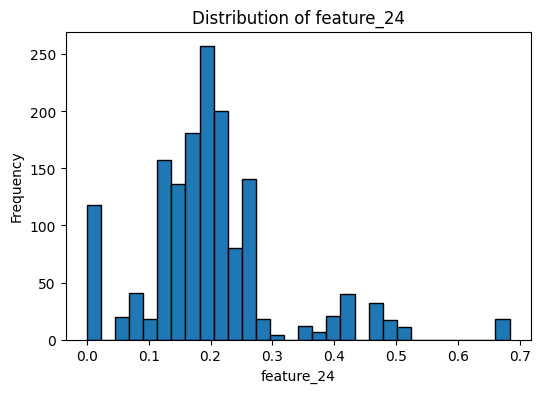

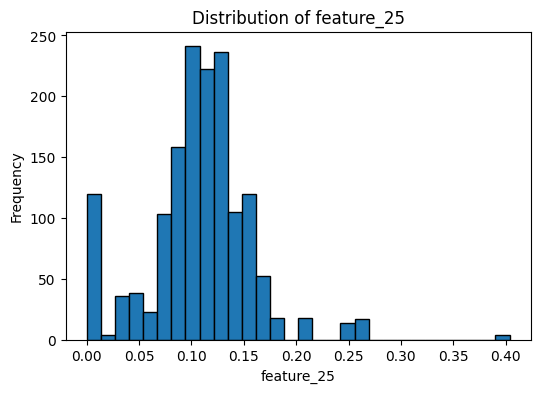

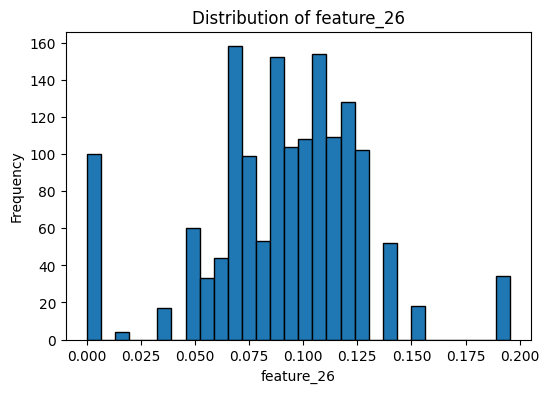

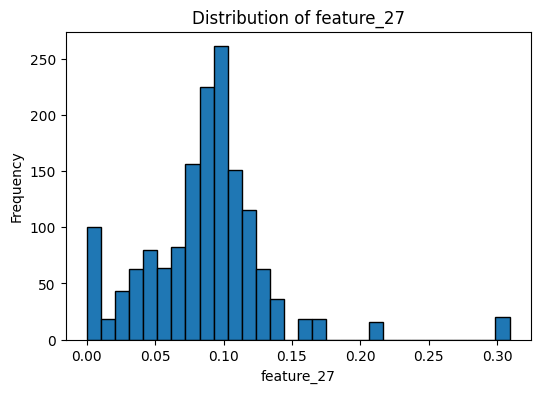

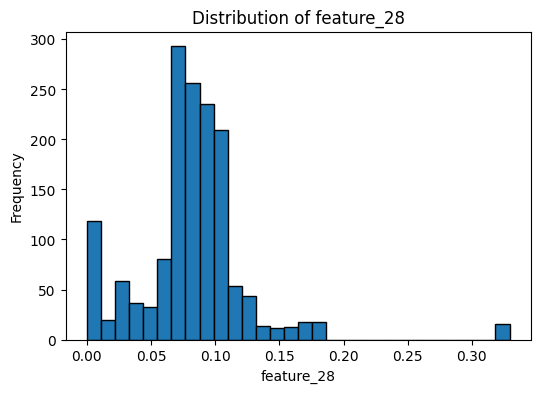

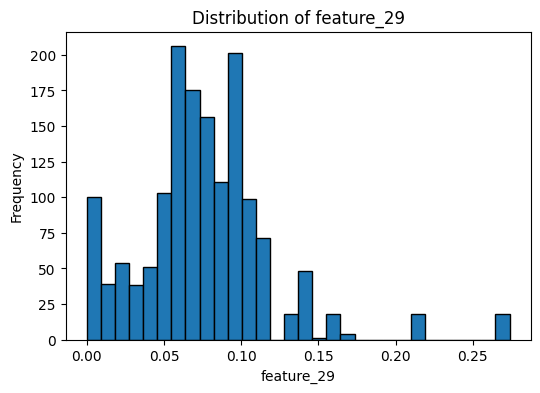

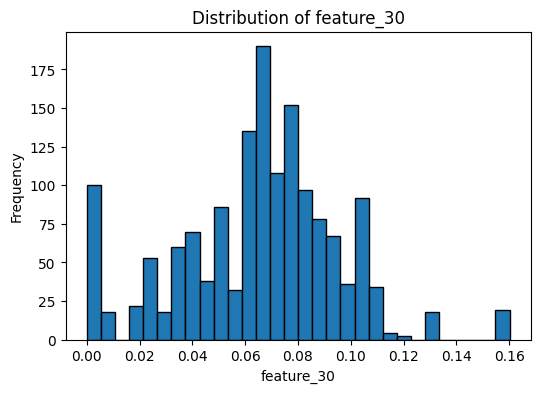

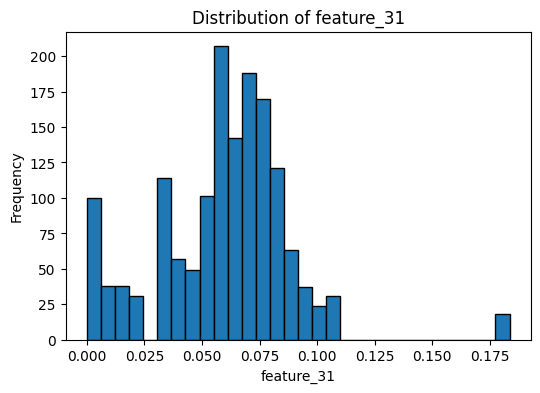

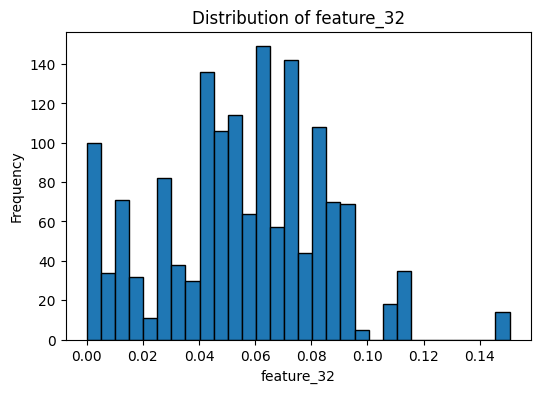

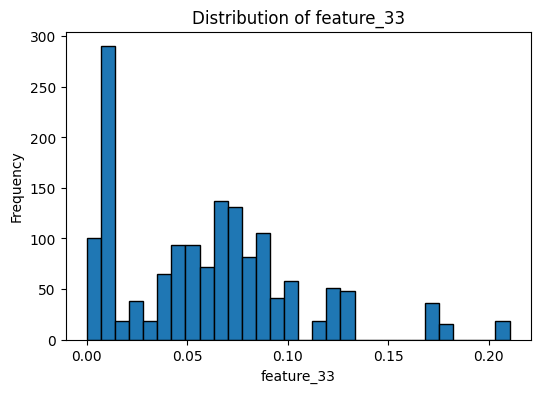

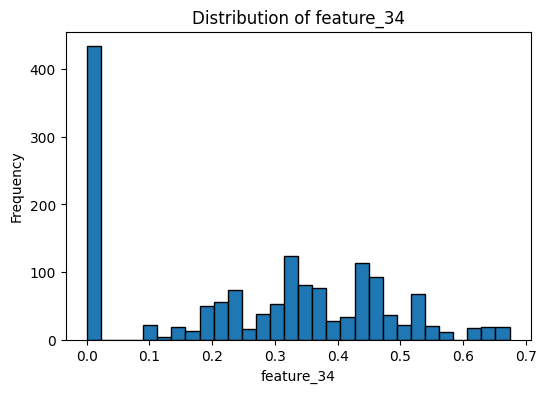

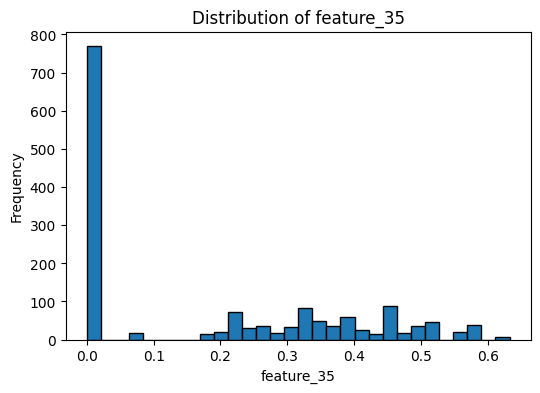

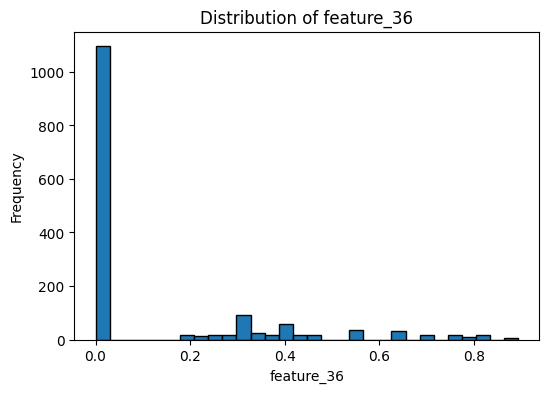

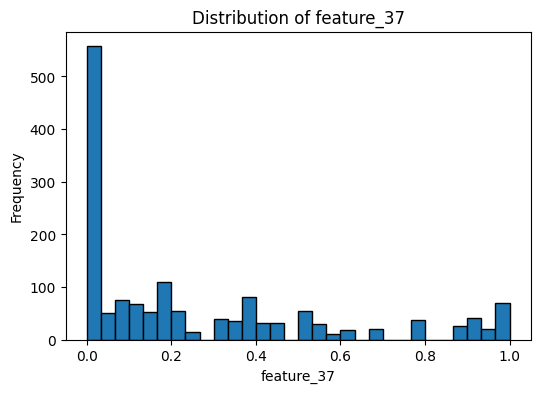

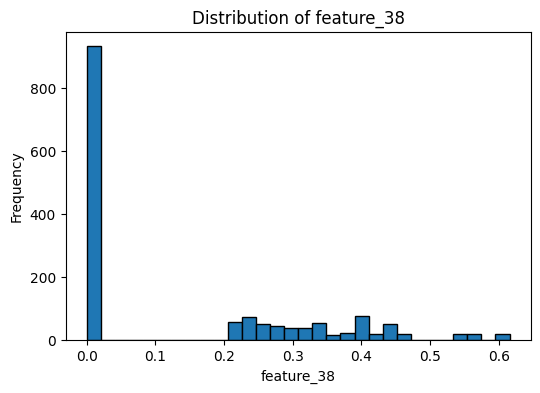

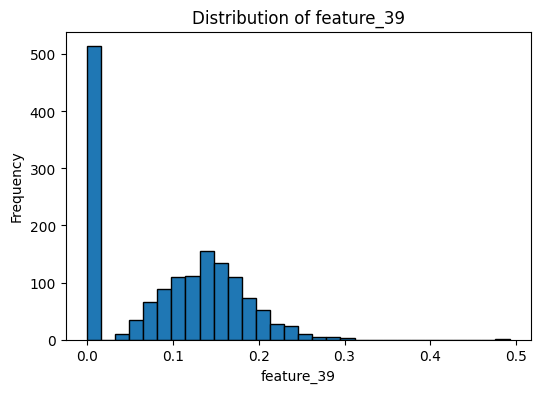

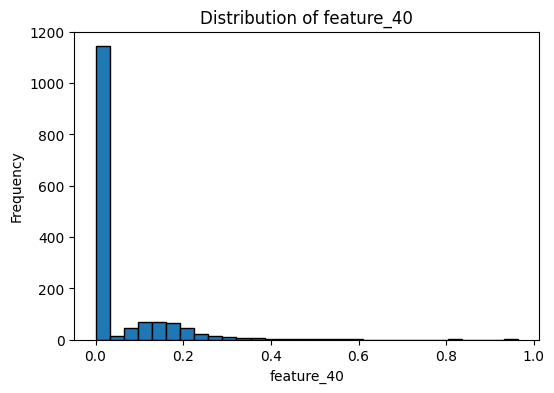

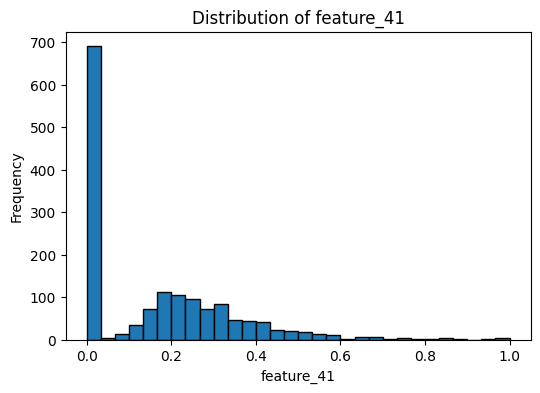

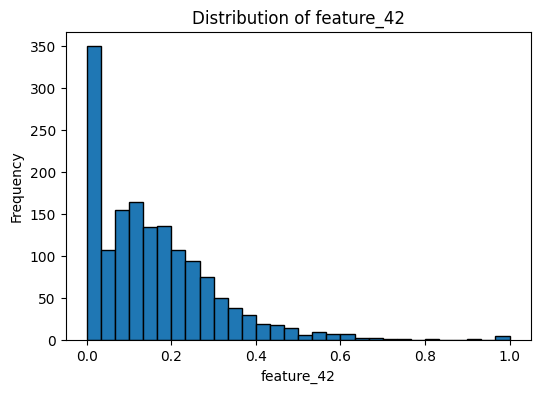

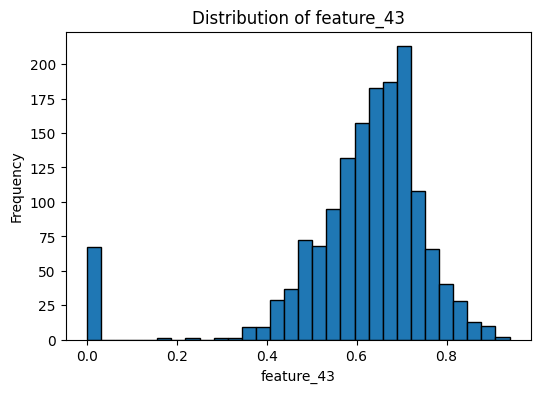

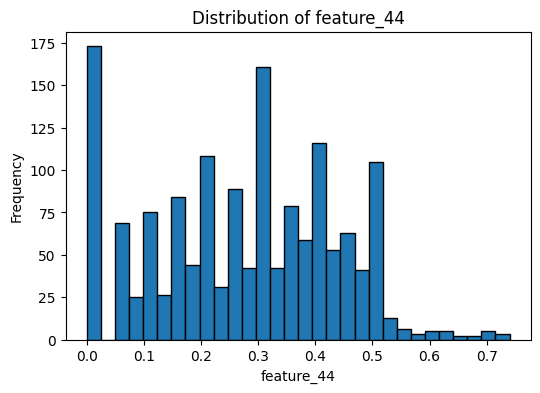

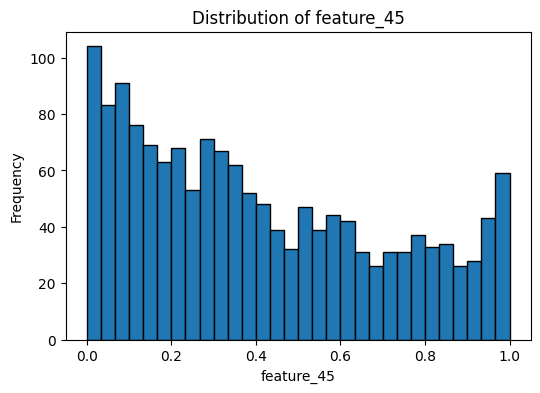

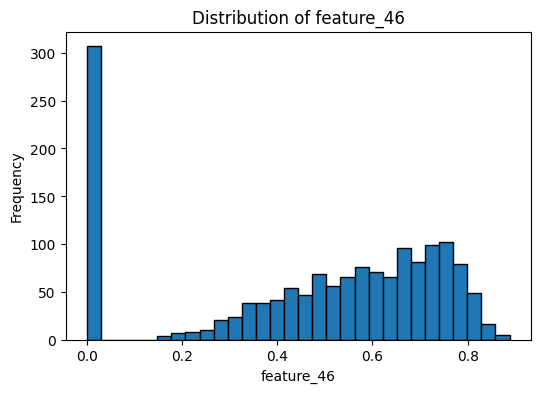

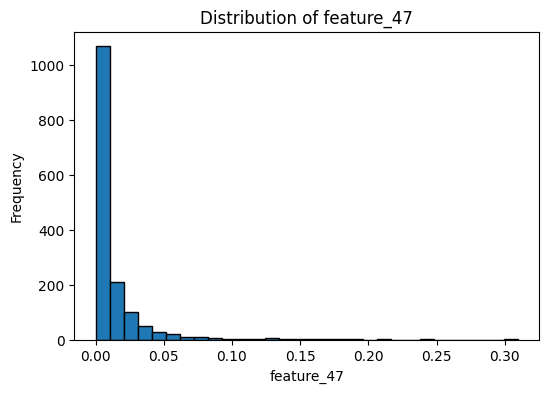

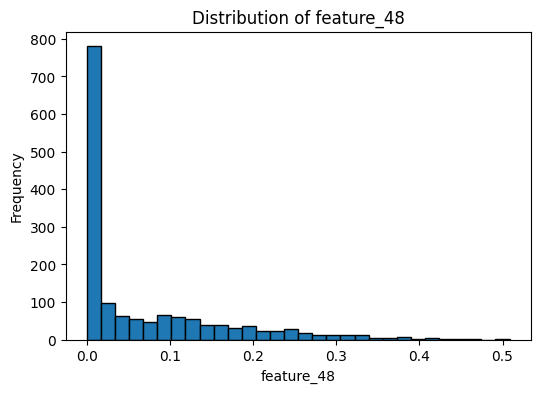

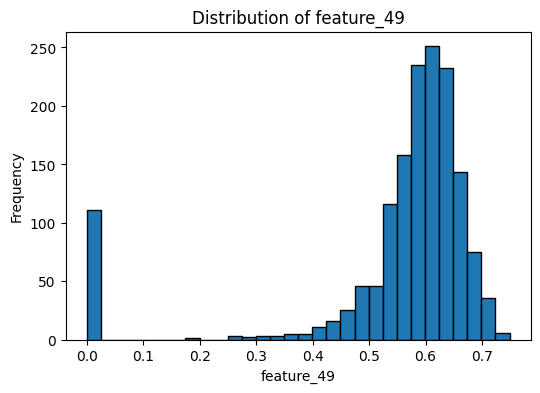

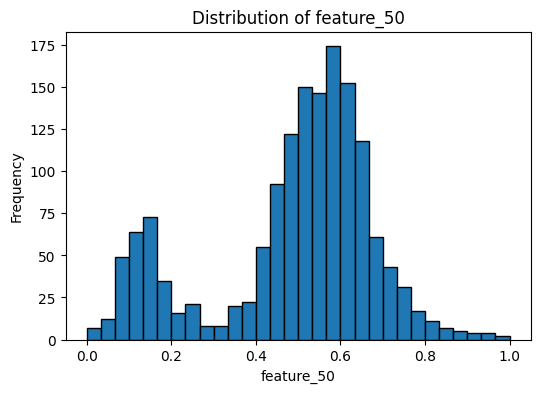

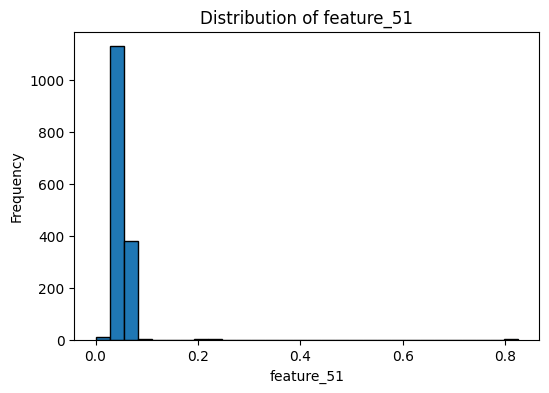

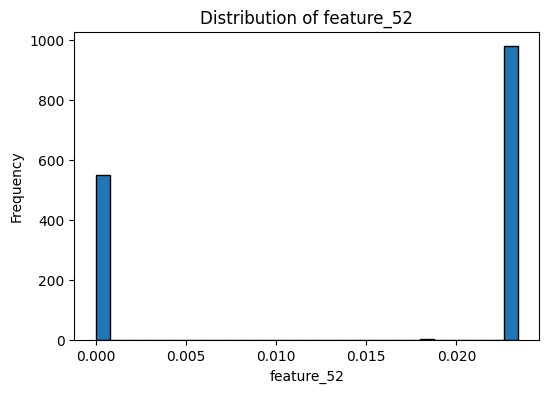

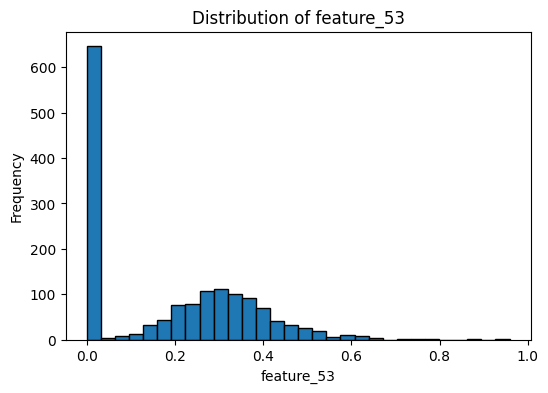

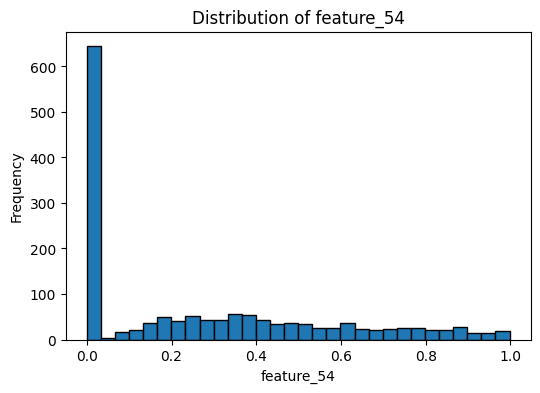

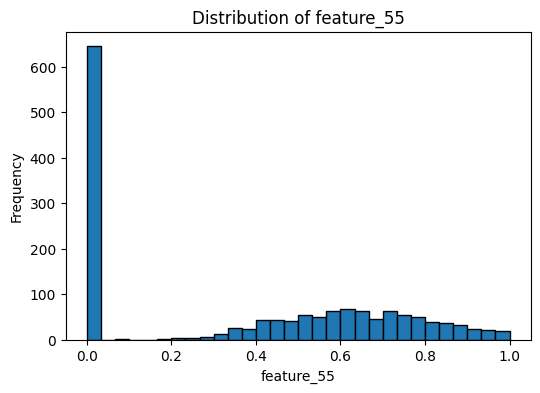

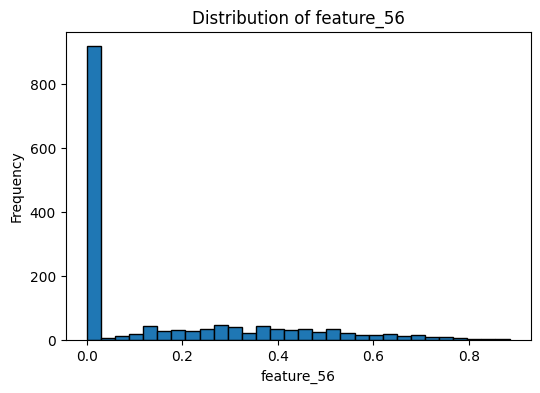

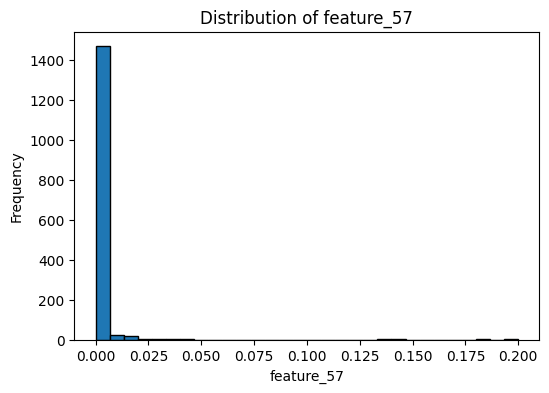

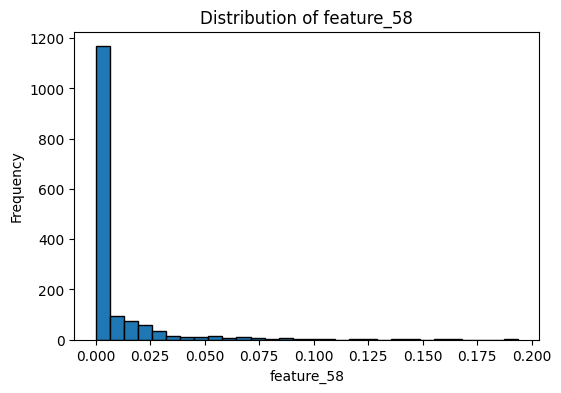

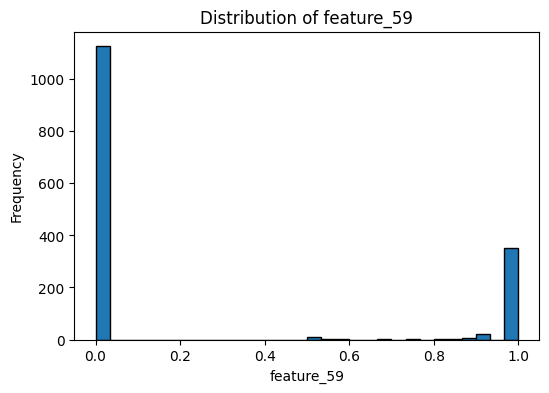

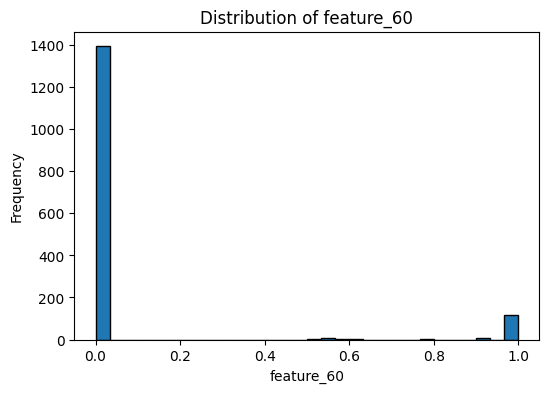

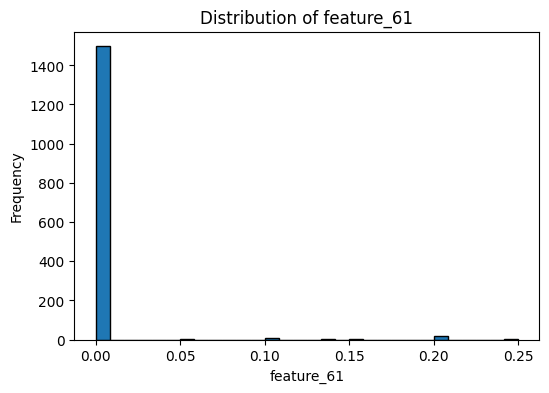

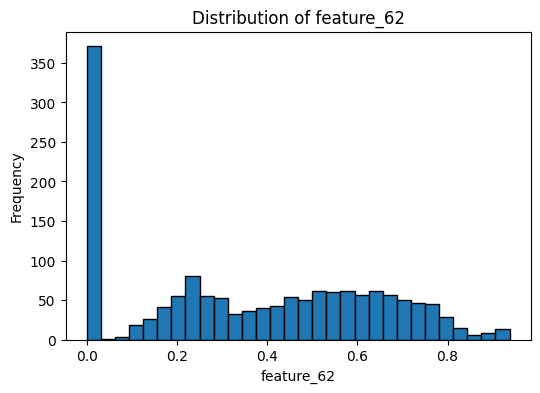

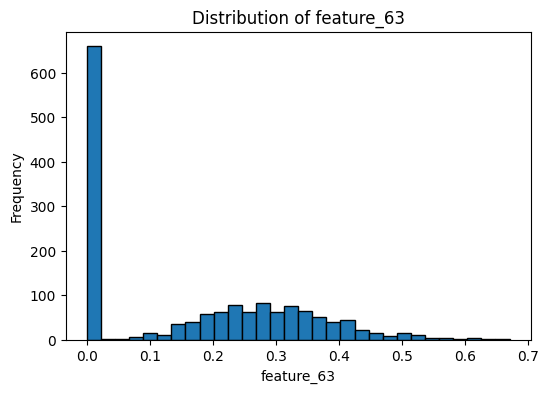

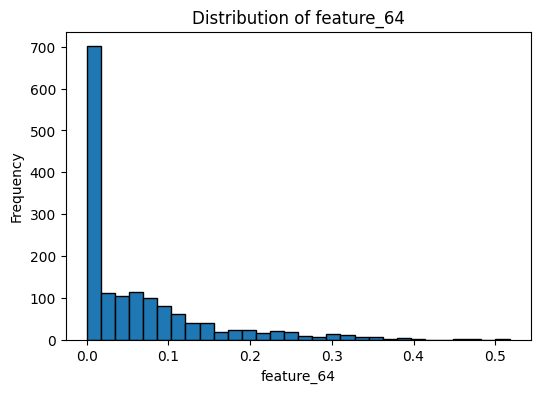

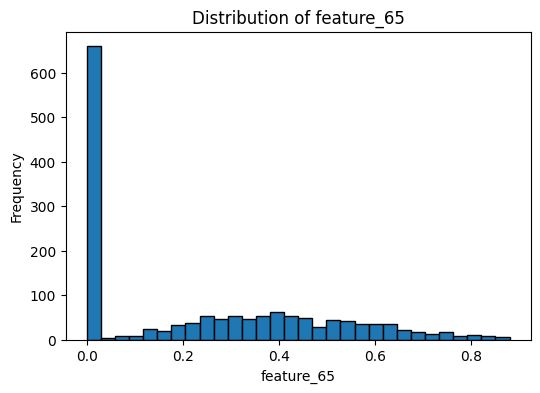

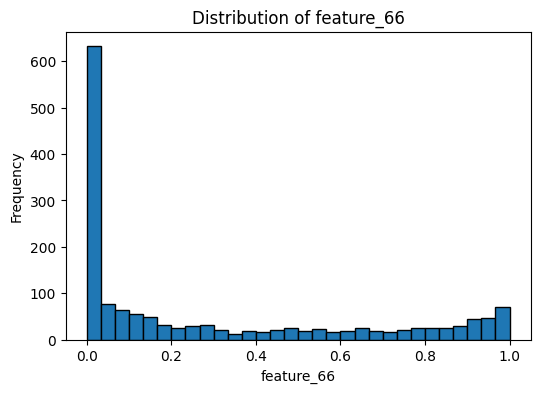

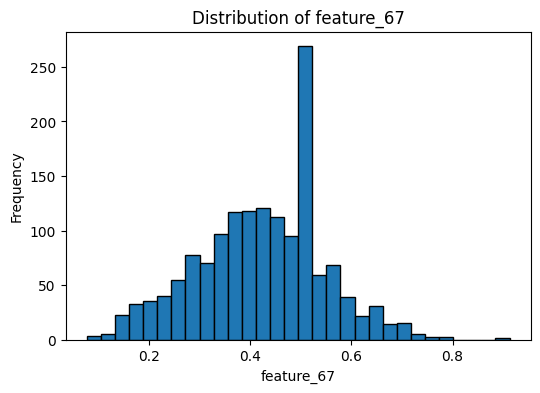

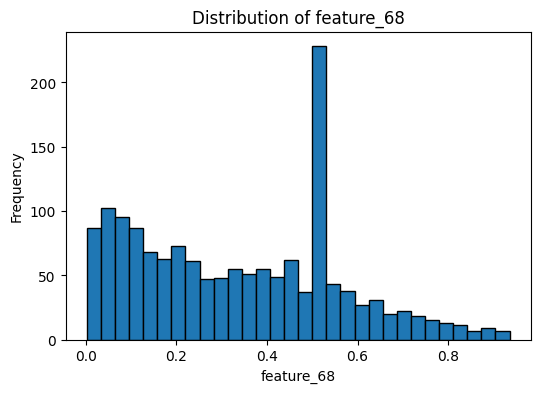

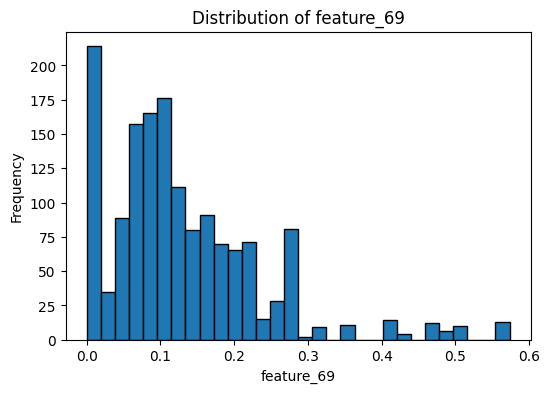

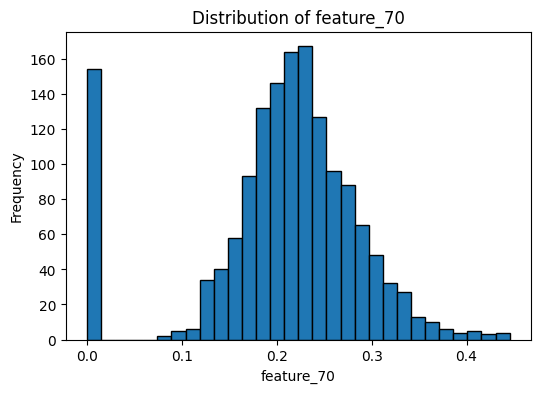

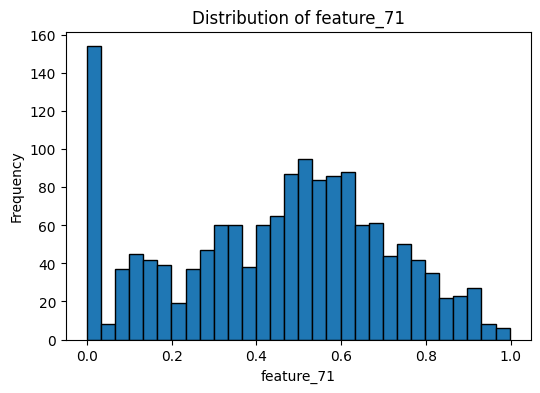

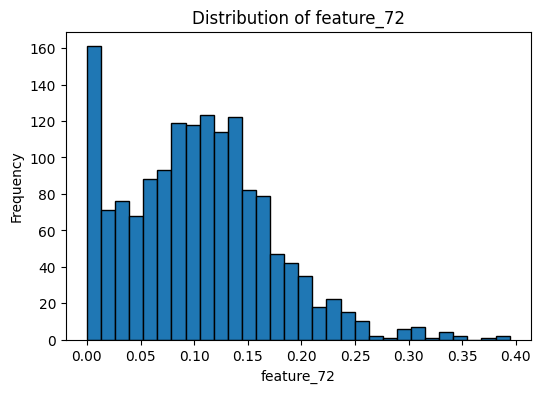

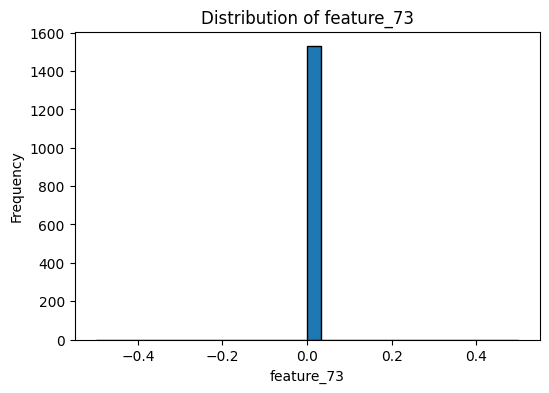

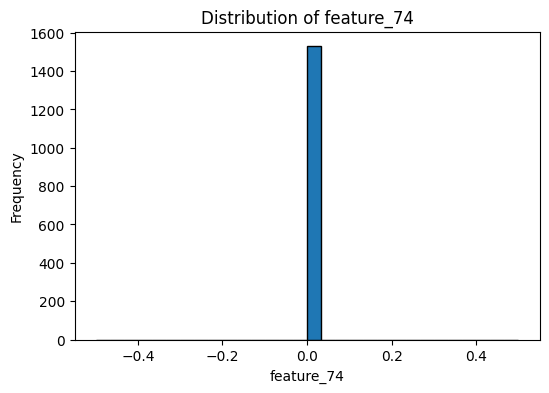

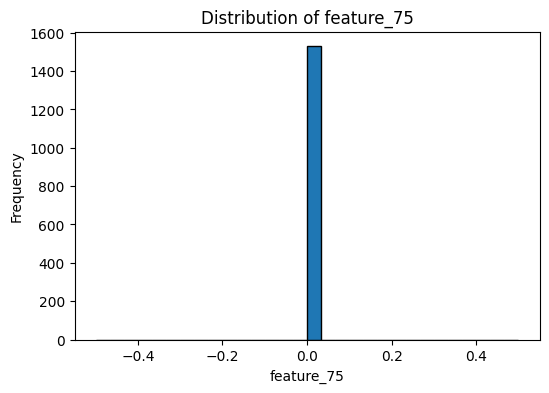

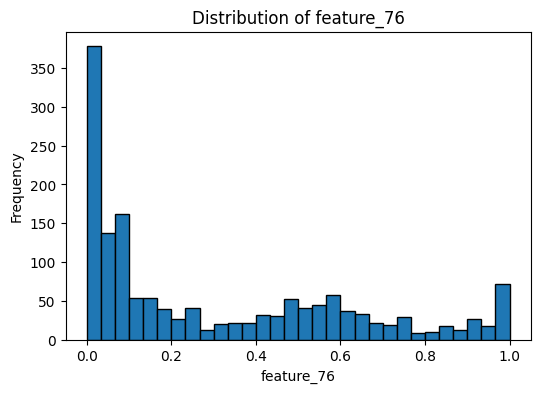

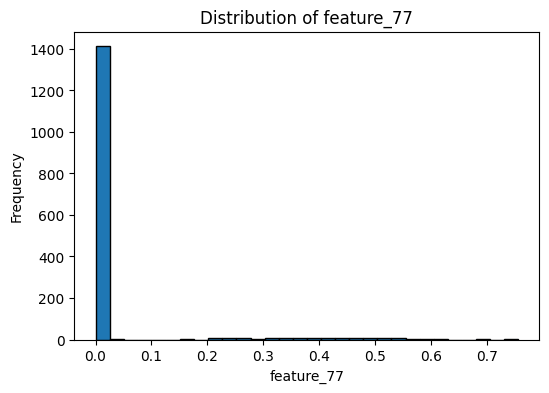

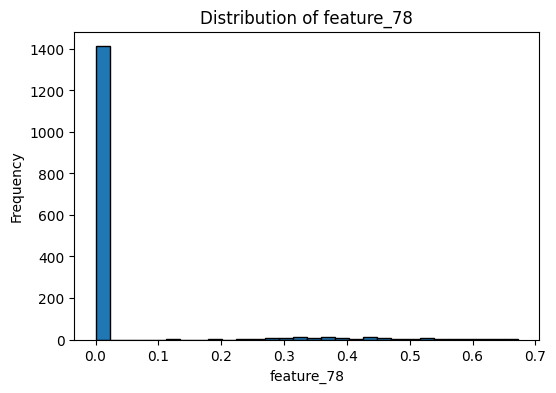

In [13]:
for column_name in x_test.columns:
    # Проверка, что столбец содержит числовые данные
      plt.figure(figsize=(6, 4))
      plt.hist(x_test[column_name], bins=30, edgecolor='black')  # Вы можете настроить количество "bins" по вашему усмотрению
      plt.title(f'Distribution of {column_name}')
      plt.xlabel(column_name)
      plt.ylabel('Frequency')
      plt.show()

Сначала напишем функции для подсчета метрики (из условия не понятна фраза "посчитать для всех документов" поэтому будем считать для всех документов в рамках одного запроса и просто для всех документов)

In [21]:
from sklearn.metrics import ndcg_score

def count_metric(preds, y_true):
    return ndcg_score([y_true], [preds])


Если считаем среднее по всем группам запросов, то

In [22]:
def my_dcg(y_true, predicted):
    sorted = np.argsort(predicted)[::-1]
    res = 0
    for i in range(len(sorted)):
        res += y_true[sorted[i]] / np.log2(i + 2)
    return res

def count_metric_gr(idx, preds, y_true):
    pred_gr = {}
    true_gr = {}

    for i in range(len(idx)):
      if idx[i] not in pred_gr.keys():
        pred_gr[idx[i]] = [preds[i]]
        true_gr[idx[i]] = [y_true[i]]
      else:
        pred_gr[idx[i]].append(preds[i])
        true_gr[idx[i]].append(y_true[i])

    res = 0
    count = 0

    for k, v in pred_gr.items():
      count_rel = sum(true_gr[k])
      if count_rel == 0:
        continue
      dcg = my_dcg(np.array(true_gr[k]), np.array(v))
      idcg = 0
      for i in range(count_rel):
          idcg += 1 / np.log2(i + 2)

      res += dcg / idcg
      count += 1

    return res / count

## Поточечный подход, сведем к задаче бинарной классификации

Мы не знаем порядок релевантности, поэтому, будем решать просто бинарную классификацию, без учета относительного расположения документов в ранжированном списке

### KNN

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()

x_train1 = x_train.drop("search_id", axis=1)
ids_train = list(x_train["search_id"])

x_test1 = x_test.drop("search_id", axis=1)
ids_test = list(x_test["search_id"])

x_val1 = x_val.drop("search_id", axis=1)
ids_val = list(x_val["search_id"])

In [25]:
x_train_scaled = scaler.fit_transform(x_train1)
x_test_scaled = scaler.fit_transform(x_test1)
x_val_scaled = scaler.fit_transform(x_val1)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train_scaled, y_train)
y_preds = neigh.predict(x_train_scaled)

In [18]:
count_metric(y_preds, y_train)

0.9999999999999994

In [19]:
count_metric_gr(ids_train, y_preds, list(y_train))

1.0

In [20]:
y_preds = neigh.predict(x_val_scaled)
print("Metric all: ", count_metric(y_preds, y_val))
print("Metric group: ", count_metric_gr(ids_val, y_preds, y_val))

Metric all:  0.48650900765456556
Metric group:  0.42913123611931603


In [21]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train_scaled, y_train)
y_preds = neigh.predict(x_train_scaled)

print("Metric all: ", count_metric(y_preds, y_train))
print("Metric group: ", count_metric_gr(ids_train, y_preds, list(y_train)))


Metric all:  0.5914802127060903
Metric group:  0.4544337467149555


In [22]:
y_preds = neigh.predict(x_val_scaled)
print("Metric all: ", count_metric(y_preds, y_val))
print("Metric group: ", count_metric_gr(ids_val, y_preds, y_val))

Metric all:  0.46463837610512265
Metric group:  0.4236035413671134


In [27]:
def run_metrics(ids, y_preds, y_true):
  print("Metric all: ", count_metric(y_preds, y_true))
  print("Metric group: ", count_metric_gr(ids, y_preds, y_true))

Примем результат KNN за бейзлайн

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression().fit(x_train_scaled, y_train)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4674074579422676
Metric group:  0.42111033824385546


In [26]:
model = LogisticRegression(penalty='l1', solver='liblinear').fit(x_train_scaled, y_train)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4674074579422676
Metric group:  0.42111033824385546


Вспомним что у нас вообще-то жесткий дизбаланс классов, попробуем оверсемплануть

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_train1, y_train)

y_ros.value_counts()

0    11829
1    11829
Name: target, dtype: int64

In [28]:
x_ros_scaled = scaler.fit_transform(x_ros)
model = LogisticRegression().fit(x_ros_scaled, y_ros)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4840764483353935
Metric group:  0.4245420900659332


Есс чуть-чуть помогло

### CatBoost

In [29]:
!pip install catboost

In [30]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
)
model.fit(x_train_scaled, y_train)

0:	learn: 0.5222233	total: 71.6ms	remaining: 7.09s
1:	learn: 0.3961194	total: 92ms	remaining: 4.51s
2:	learn: 0.3099610	total: 110ms	remaining: 3.55s
3:	learn: 0.2499181	total: 128ms	remaining: 3.08s
4:	learn: 0.2066660	total: 147ms	remaining: 2.79s
5:	learn: 0.1725461	total: 166ms	remaining: 2.6s
6:	learn: 0.1503235	total: 185ms	remaining: 2.45s
7:	learn: 0.1344708	total: 203ms	remaining: 2.33s
8:	learn: 0.1220738	total: 223ms	remaining: 2.25s
9:	learn: 0.1143787	total: 243ms	remaining: 2.19s
10:	learn: 0.1075792	total: 265ms	remaining: 2.14s
11:	learn: 0.1028878	total: 289ms	remaining: 2.12s
12:	learn: 0.0991789	total: 312ms	remaining: 2.09s
13:	learn: 0.0958698	total: 332ms	remaining: 2.04s
14:	learn: 0.0937143	total: 352ms	remaining: 2s
15:	learn: 0.0911743	total: 371ms	remaining: 1.95s
16:	learn: 0.0894385	total: 389ms	remaining: 1.9s
17:	learn: 0.0880593	total: 408ms	remaining: 1.86s
18:	learn: 0.0869818	total: 426ms	remaining: 1.82s
19:	learn: 0.0858229	total: 444ms	remaining: 1

In [31]:
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4674074579422676
Metric group:  0.42111033824385546


### DL

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
model = MLPClassifier(hidden_layer_sizes=(100, 50, 20), random_state=42)
model.fit(x_train_scaled, y_train)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.46463837610512265
Metric group:  0.4207489867832568


In [34]:
model = MLPClassifier(hidden_layer_sizes=(100, 50, 20), random_state=42)
model.fit(x_ros_scaled, y_ros)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4835524714432113
Metric group:  0.421955769002854


In [35]:
model = MLPClassifier(hidden_layer_sizes=(100, 50, 50), random_state=42)
model.fit(x_ros_scaled, y_ros)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4883464210630073
Metric group:  0.41727014059479745


In [36]:
model = MLPClassifier(hidden_layer_sizes=(100, 100, 50), random_state=42)
model.fit(x_ros_scaled, y_ros)
y_preds = model.predict(x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.471699823588348
Metric group:  0.4237479593985728


## Pairwise learning

### RankingSVM

Буду опираться на открытый код решения RankingSVM: https://gist.github.com/fabianp/2020955

In [37]:
train_df[train_df['target'] == 1]

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
3050,303632,9,0,0,0,9,4,0,0,0,...,0.168805,0.214750,0.036251,0,0,0,0.00000,0.0,0.0,1
3089,308598,9,0,0,1,20,4,34,0,0,...,0.329238,0.513573,0.169088,0,0,0,0.00000,0.0,0.0,1
3217,327605,9,0,0,0,9,4,25,0,0,...,0.266688,0.322659,0.086049,0,0,0,0.52308,0.0,0.0,1
3221,327605,9,0,0,0,9,4,25,0,0,...,0.225130,0.315831,0.071103,0,0,0,0.36310,0.0,0.0,1
3229,327605,9,0,0,0,9,4,25,0,0,...,0.210566,0.304108,0.064035,0,0,0,0.17985,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14956,483503,9,0,3,1,20,4,25,0,0,...,0.200747,0.532890,0.106976,0,0,0,0.18174,0.0,0.0,1
14987,488601,9,0,0,1,20,4,31,0,0,...,0.241641,0.457174,0.110472,0,0,0,0.67614,0.0,0.0,1
15020,491401,9,0,0,0,9,4,33,4,1,...,0.290943,0.887513,0.258216,0,0,0,0.99311,0.0,0.0,1
15022,491401,9,0,0,0,9,4,33,4,1,...,0.361866,0.712246,0.257738,0,0,0,0.76455,0.0,0.0,1


In [5]:
import itertools
import numpy as np
from sklearn import svm, linear_model


def transform_pairwise(X, y):
    X_new = []
    y_new = []
    y = np.asarray(y)
    if y.ndim == 1:
        y = np.c_[y, np.ones(y.shape[0])]
    comb = itertools.permutations(range(X.shape[0]), 2)
    for k, (i, j) in enumerate(comb):
        if y[i, 0] == y[j, 0] or y[i, 1] != y[j, 1]:
            continue
        X_new.append(X[i] - X[j])
        y_new.append(np.sign(y[i, 0] - y[j, 0]))
        if y_new[-1] != (-1) ** k:
            y_new[-1] = - y_new[-1]
            X_new[-1] = - X_new[-1]
    return np.asarray(X_new), np.asarray(y_new).ravel()




In [39]:
y_train[x_train['search_id'] == 58160]

10473    0
10474    0
10475    1
10476    0
Name: target, dtype: int64

In [40]:
transform_pairwise(x_train_scaled[x_train['search_id'] == 58160], y_train[x_train['search_id'] == 58160])

(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -2.24291278e+00, -2.30213299e+00,
         -3.26073983e+00,  3.13701657e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -3.52208178e-01,  3.03094252e-01, -4.23784613e+00,
          1.10222902e+00,  6.71100996e-01,  7.04835808e-01,
         -8.05477045e-01,  5.15581528e-01,  3.66716827e-01,
          2.22898409e-01, -3.60687108e-0

In [6]:
class RankSVM(svm.LinearSVC):
    def fit(self, ids, X, y):
      ids = np.array(ids)
      unique = np.unique(ids)
      res_x = []
      res_y = []
      for i in unique:
        X_trans, y_trans = transform_pairwise(X[ids == i], y[ids == i])
        if not np.any(X_trans):
          continue
        res_x.append(X_trans)
        res_y.append(y_trans)

      x_trans_ac = np.concatenate(res_x)
      y_trans_ac = np.concatenate(res_y)

      super(RankSVM, self).fit(x_trans_ac, y_trans_ac)
      return self

    def decision_function(self, X):
        return np.dot(X, self.coef_.ravel())

    def predict(self, ids, X):
        if hasattr(self, 'coef_'):
          ids = np.array(ids)
          unique = np.unique(ids)
          res = []
          for i in unique:
            res += list(np.dot(X[ids == i], self.coef_.ravel()))
          return np.array(res)
        else:
            raise ValueError("Must call fit() prior to predict()")

    def score(self, X, y):
        X_trans, y_trans = transform_pairwise(X, y)
        return np.mean(super(RankSVM, self).predict(X_trans) == y_trans)


In [42]:
model = RankSVM()
model.fit(ids_train, x_train_scaled, y_train)
y_preds = model.predict(ids_val, x_val_scaled)
run_metrics(ids_val, y_preds, y_val)

Metric all:  0.4984176174255416
Metric group:  0.44701047673562183


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Пока лучший результат, посчитаем метрику на тестовой выборке:


In [43]:
train_df_f = pd.read_csv("train_df.csv")

x_train_f = train_df_f.drop("target", axis=1)
y_train_f = train_df_f['target']
scaler = StandardScaler()

x_train1_f = x_train_f.drop("search_id", axis=1)
ids_train_f = list(x_train_f["search_id"])

x_train_scaled_f = scaler.fit_transform(x_train1_f)

model = RankSVM()
model.fit(ids_train_f, x_train_scaled_f, y_train_f)
y_preds = model.predict(ids_test, x_test_scaled)
run_metrics(ids_test, y_preds, y_test)

Metric all:  0.3811729772959504
Metric group:  0.4400744053445443


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [44]:
train_df_f = pd.read_csv("train_df.csv")

x_train_f = train_df_f.drop("target", axis=1)
y_train_f = train_df_f['target']
scaler = StandardScaler()

x_ros_f, y_ros_f = ros.fit_resample(x_train_f, y_train_f)
x_train1_f = x_ros_f.drop("search_id", axis=1)
ids_train_f = list(x_ros_f["search_id"])

x_train_scaled_f = scaler.fit_transform(x_train1_f)

model = RankSVM()
model.fit(ids_train_f, x_train_scaled_f, y_ros_f)
y_preds = model.predict(ids_test, x_test_scaled)
run_metrics(ids_test, y_preds, y_test)

Metric all:  0.38078442129307316
Metric group:  0.4394767711364255


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Запакуем модель, которая училась без оверсемплинга

In [28]:
train_df_f = pd.read_csv("train_df.csv")

x_train_f = train_df_f.drop("target", axis=1)
y_train_f = train_df_f['target']
scaler = StandardScaler()

x_train1_f = x_train_f.drop("search_id", axis=1)
ids_train_f = list(x_train_f["search_id"])

x_train_scaled_f = scaler.fit_transform(x_train1_f)

model = RankSVM()
model.fit(ids_train_f, x_train_scaled_f, y_train_f)
y_preds = model.predict(ids_test, x_test_scaled)
run_metrics(ids_test, y_preds, y_test)

Metric all:  0.3812726200088209
Metric group:  0.4421592590664868


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
import joblib
joblib.dump(model,"model_rank_svm_without_ros.pk1")

['model_rank_svm_without_ros.pk1']